In [1]:
import openai
import string
openai.api_key = 'your API key'

In [58]:
import random
random.seed(55)
agents = {}
colors = ["blue", "green"]

for i in range(1, 9):
    agent_key = "agent_" + str(i)
    agent_color = random.choice(colors)
    agents[agent_key] = agent_color

print(agents)

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'blue', 'agent_4': 'green', 'agent_5': 'blue', 'agent_6': 'blue', 'agent_7': 'green', 'agent_8': 'blue'}


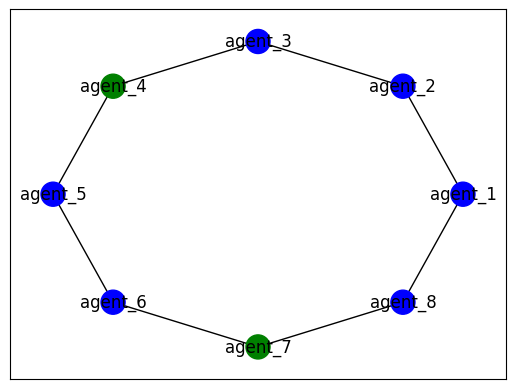

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Define the number of nodes
num_nodes = 8


# Add nodes and edges to the graph
G.add_nodes_from(agents.keys())
edges = [('agent_{}'.format(i), 'agent_{}'.format(i + 1)) for i in range(1, num_nodes)] + [('agent_{}'.format(num_nodes), 'agent_1')]
G.add_edges_from(edges)

# Specify the colors
default_color = 'red'

# Assign colors to the nodes based on the agents dictionary
node_colors = [agents.get(node, default_color) for node in G.nodes]

# Replace None with default_color in node_colors
node_colors = [default_color if color is None else color for color in node_colors]

# Draw the graph as a circular layout
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)

# Show the graph
plt.show()

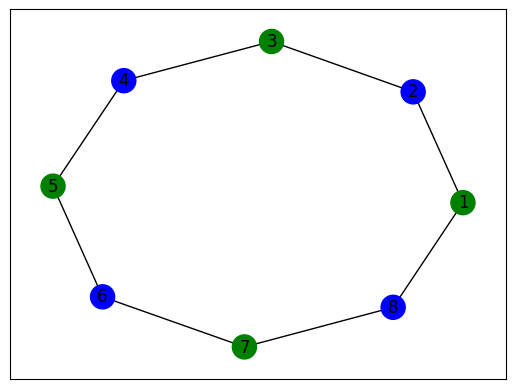

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes to the graph
num_nodes = 8
G.add_nodes_from(range(1, num_nodes + 1))

# Add edges to the graph
edges = [(i, i + 1) for i in range(1, num_nodes)] + [(num_nodes, 1)]
G.add_edges_from(edges)

# Specify the colors
colors = ['green', 'blue']

# Perform graph coloring
node_colors = nx.greedy_color(G, strategy='largest_first')

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color=[colors[node_colors[node]] for node in G.nodes], with_labels=True)

# Show the graph
plt.show()

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
def grapth(agents):
    # Create a graph
    G = nx.Graph()

    # Define the number of nodes
    num_nodes = 8


    # Add nodes and edges to the graph
    G.add_nodes_from(agents.keys())
    edges = [('agent_{}'.format(i), 'agent_{}'.format(i + 1)) for i in range(1, num_nodes)] + [('agent_{}'.format(num_nodes), 'agent_1')]
    G.add_edges_from(edges)

    # Specify the colors
    default_color = 'red'

    # Assign colors to the nodes based on the agents dictionary
    node_colors = [agents.get(node, default_color) for node in G.nodes]

    # Replace None with default_color in node_colors
    node_colors = [default_color if color is None else color for color in node_colors]

    # Draw the graph as a circular layout
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)

    # Show the graph
    plt.show()

In [2]:
import requests
import json
import random
# Define the endpoint URL for the ChatGPT API
url = 'https://api.openai.com/v1/chat/completions'

# Set your OpenAI API key
api_key = 'your API key'

# Set the headers including the authorization with your API key
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {api_key}'
}

In [63]:
# Function to send a message to an agent and get the response
def send_message(message, agent_id):
    data = {
        'model': 'gpt-3.5-turbo',
        'messages': [
            {'role': 'system', 'content': 'You are a helpful assistant.'},
            {'role': 'user', 'content': message}
        ],
        'temperature':temperature
    }

    response = requests.post(url, headers=headers, json=data)

    if response.status_code == 200:
        result = response.json()
        answer = result['choices'][0]['message']['content']
#         print(f"Agent {agent_id}'s response: {answer}")
        return answer
    else:
        print(f"Request failed for Agent {agent_id} with status code: {response.status_code}")
        return None

In [64]:
# Define the initial message to Agent 1
def initial_massage_for_agent(num,agents):
    color_of_agent = agents[f'agent_{num}']
    if num == len(agents): 
        friend_on_the_right = agents[f'agent_{1}']
        friend_on_the_left = agents[f'agent_{num-1}']
    elif num == 1:
        friend_on_the_right = agents[f'agent_{num+1}']
        friend_on_the_left = agents[f'agent_{len(agents)}']
#     # Send the initial message to Agent 1
    else:
        friend_on_the_right = agents[f'agent_{num+1}']
        friend_on_the_left = agents[f'agent_{num-1}']
    return f" RESPOND ONLY WITH ONE WORD 'green' or 'blue': You are playing a color game. You are {color_of_agent}. Your friend on the right is {friend_on_the_right}, and your friend on the left is {friend_on_the_left}.Rules of the game: a. If your friend on the left and friend on the right have the same color, then you have to choose a different color than their color. For example, if firend from the right is 'blue' and firend from the left is 'blue' then you are green. Another example if your friend on the left is 'green' and on the right is 'green' then you choose 'blue'.b. If your friends have different colors (one is blue and the other is green), you must choose either 'blue' or 'green' randomly.c. If your friend on the left or on the right is not present (None), or if you are 'None', and your friends have the same color then choose a different color than their color (either 'blue' or 'green').d. You must respond with only one word, either 'green' or 'blue' in lowercase, even if you can't decide.I will keep these rules in mind . Respond only with the words 'green' or 'blue' in lowercase! YOU HAVE TO CHOOSE! If you can't decide, you must respond with only one word - green or blue! RESPOND ONLY ONE WORD!!!!"

In [65]:
def process_agents(agent_response):
    valid_colors = ['green', 'blue']
    processed_agents = {}
    if agent_response is not None:
            color = agent_response.lower().translate(str.maketrans("", "", string.punctuation))
            color = color.strip()
            if color.lower() in valid_colors:
                return color.lower()
            # Check if there is a long answer and extract 'green' or 'blue'
            elif len(color.split()) > 1:
                last_words = color.replace(',', ' ',).split()[-3:]
                for word in last_words:
                    word = word.strip('.').strip(',')
                    if word.lower() in valid_colors:
                        return word.lower()
                    else:
                        return None
            else:
                return None
    return None 

In [66]:
def check_neighbor_colors(agents):
    for num in range(1, len(agents)+1):
        color_of_agent = agents[f'agent_{num}']  
        if color_of_agent is None:
            return False      
        if num == len(agents): 
            friend_on_the_right = agents[f'agent_{1}']
            friend_on_the_left = agents[f'agent_{num-1}']
            if friend_on_the_left is None or friend_on_the_right is None:
                  return False
            if color_of_agent == friend_on_the_right or color_of_agent == friend_on_the_left:
                return False
        elif num == 1:
            friend_on_the_right = agents[f'agent_{num+1}']
            friend_on_the_left = agents[f'agent_{len(agents)}']
            if friend_on_the_left is None or friend_on_the_right is None:
                return False
            if color_of_agent == friend_on_the_right or color_of_agent == friend_on_the_left:
                return False
        else:
            friend_on_the_right = agents[f'agent_{num-1}']
            friend_on_the_left = agents[f'agent_{num+1}']
            if friend_on_the_left is None or friend_on_the_right is None:
                  return False
            if color_of_agent == friend_on_the_right or color_of_agent == friend_on_the_left:
                return False
    return True 

In [67]:
agents

{'agent_1': 'blue',
 'agent_2': 'blue',
 'agent_3': 'blue',
 'agent_4': 'green',
 'agent_5': 'blue',
 'agent_6': 'blue',
 'agent_7': 'green',
 'agent_8': 'blue'}

Agent 5's response: Green


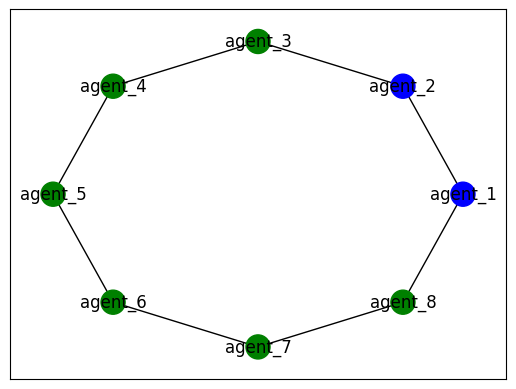

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'green', 'agent_5': 'green', 'agent_6': 'green', 'agent_7': 'green', 'agent_8': 'green'}
1
Agent 2's response: blue


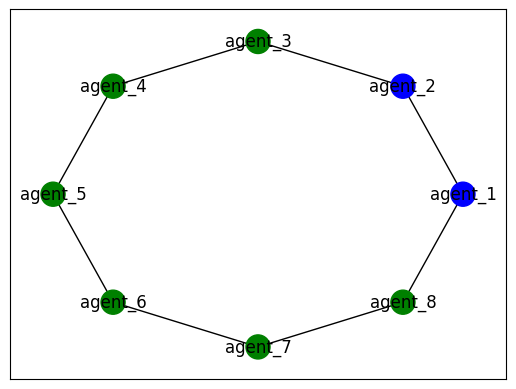

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'green', 'agent_5': 'green', 'agent_6': 'green', 'agent_7': 'green', 'agent_8': 'green'}
2
Agent 5's response: blue


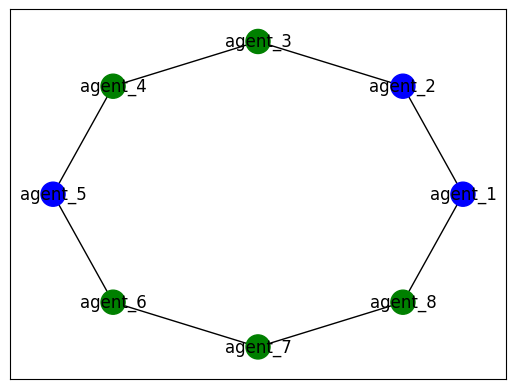

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'green', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'green', 'agent_8': 'green'}
3
Agent 1's response: Blue


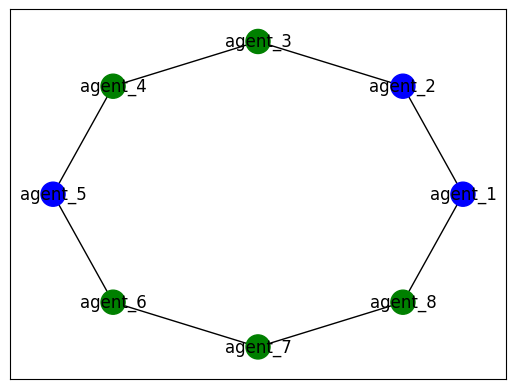

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'green', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'green', 'agent_8': 'green'}
4
Agent 7's response: Blue


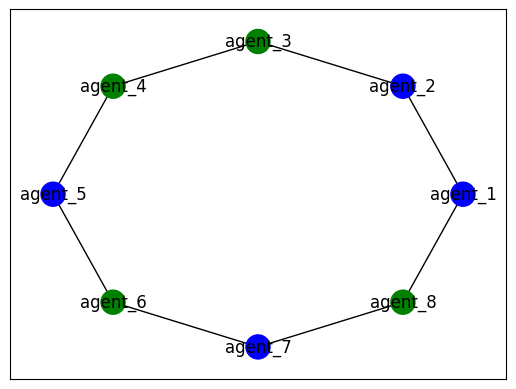

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'green', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'blue', 'agent_8': 'green'}
5
Agent 5's response: green


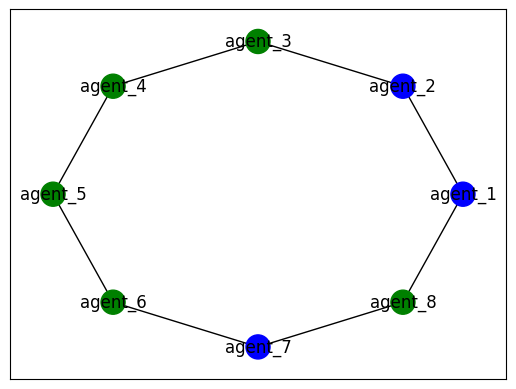

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'green', 'agent_5': 'green', 'agent_6': 'green', 'agent_7': 'blue', 'agent_8': 'green'}
6
Agent 4's response: Okay! Blue.


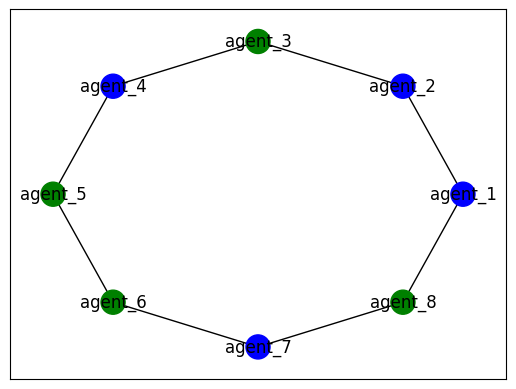

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'green', 'agent_6': 'green', 'agent_7': 'blue', 'agent_8': 'green'}
7
Agent 1's response: blue


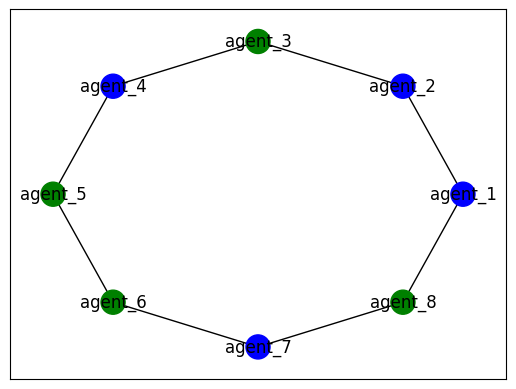

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'green', 'agent_6': 'green', 'agent_7': 'blue', 'agent_8': 'green'}
8
Agent 5's response: blue


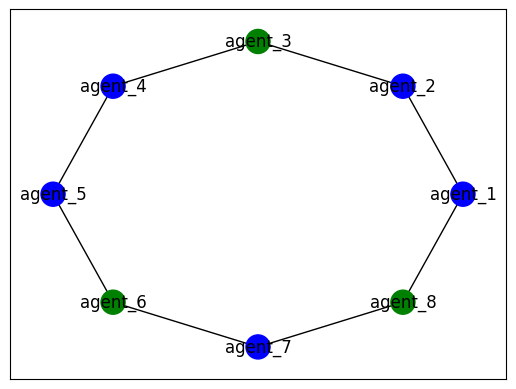

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'blue', 'agent_8': 'green'}
9
Agent 2's response: blue


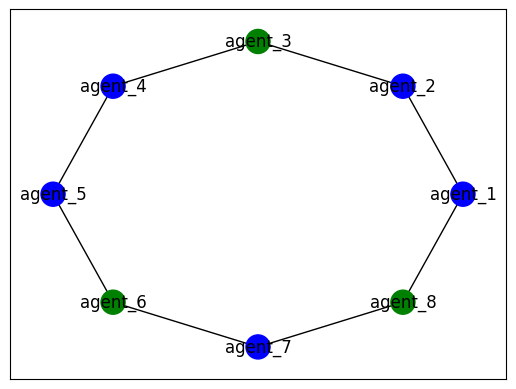

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'blue', 'agent_8': 'green'}
10
Agent 2's response: blue


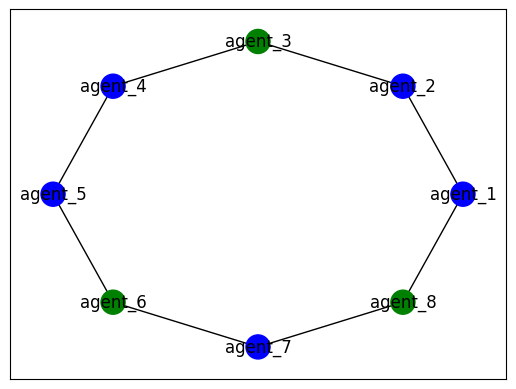

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'blue', 'agent_8': 'green'}
11
Agent 4's response: blue


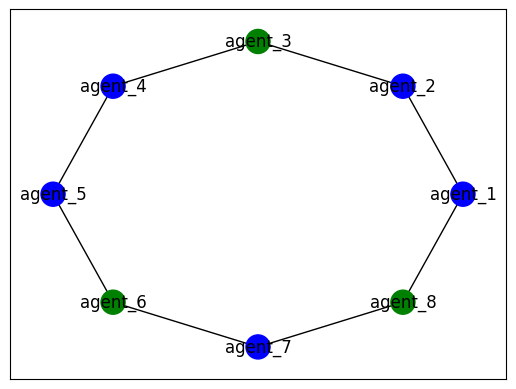

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'blue', 'agent_8': 'green'}
12
Agent 6's response: Sorry! Just responded before I had the chance to decide. Let's try it again.


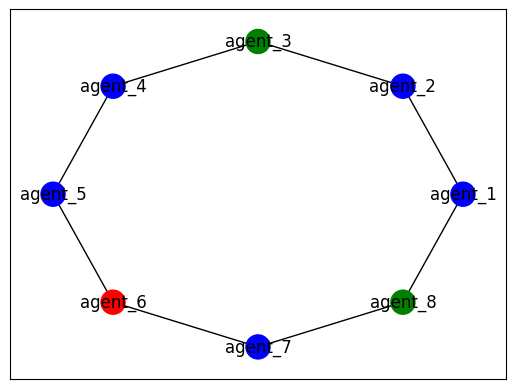

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': None, 'agent_7': 'blue', 'agent_8': 'green'}
13
Agent 5's response: blue


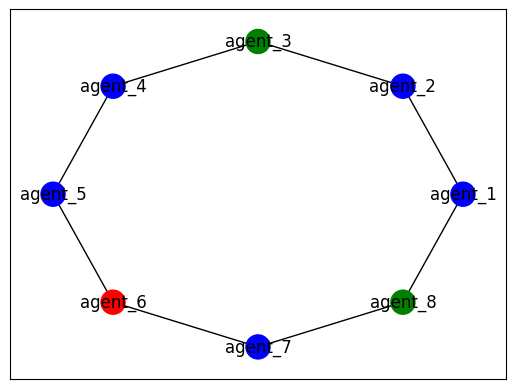

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': None, 'agent_7': 'blue', 'agent_8': 'green'}
14
Agent 7's response: green


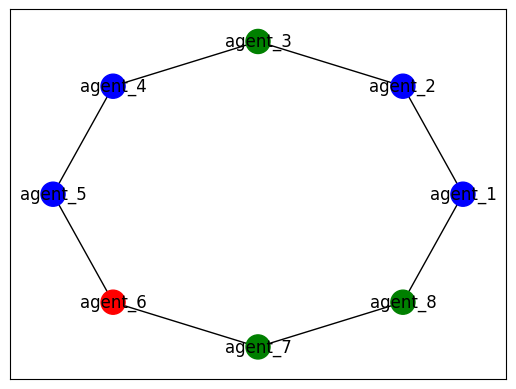

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': None, 'agent_7': 'green', 'agent_8': 'green'}
15
Agent 2's response: Blue


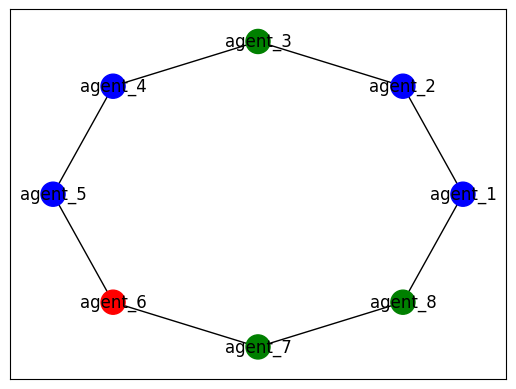

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': None, 'agent_7': 'green', 'agent_8': 'green'}
16
Agent 6's response: green


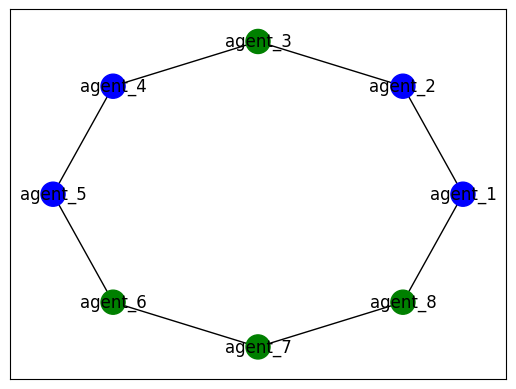

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'green', 'agent_8': 'green'}
17
Agent 2's response: blue


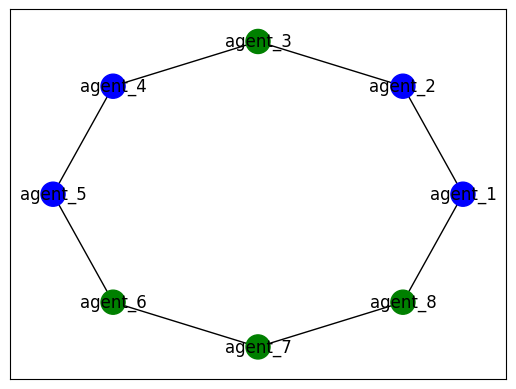

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'green', 'agent_8': 'green'}
18
Agent 2's response: Blue


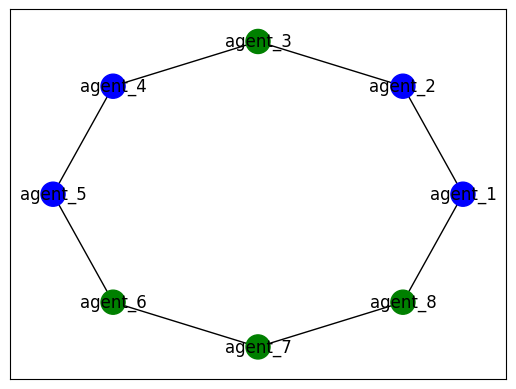

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'green', 'agent_8': 'green'}
19
Agent 6's response: blue


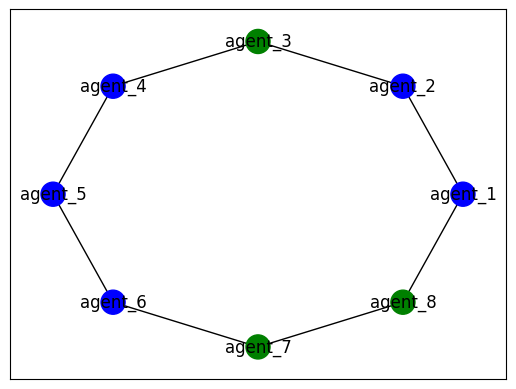

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': 'blue', 'agent_7': 'green', 'agent_8': 'green'}
20
Agent 7's response: green


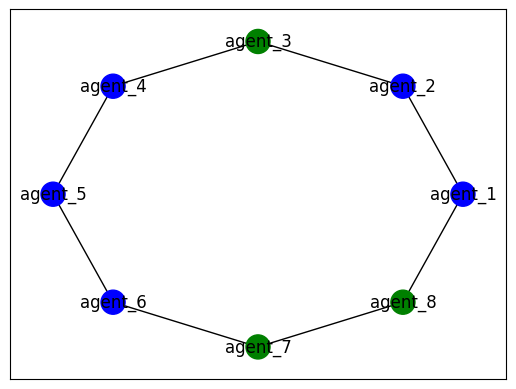

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'blue', 'agent_5': 'blue', 'agent_6': 'blue', 'agent_7': 'green', 'agent_8': 'green'}
21
Agent 4's response: Green


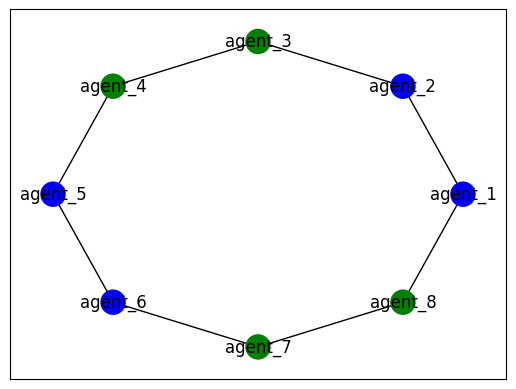

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'green', 'agent_5': 'blue', 'agent_6': 'blue', 'agent_7': 'green', 'agent_8': 'green'}
22
Agent 7's response: green


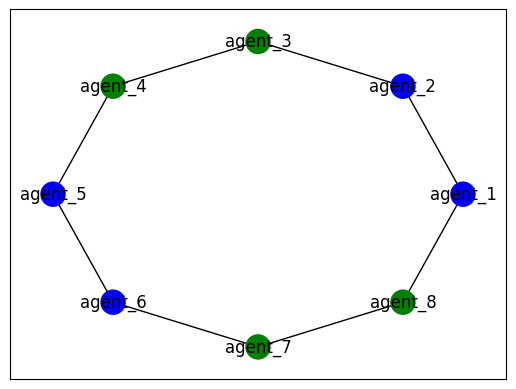

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'green', 'agent_4': 'green', 'agent_5': 'blue', 'agent_6': 'blue', 'agent_7': 'green', 'agent_8': 'green'}
23


In [ ]:
import time
agent_colors_list = []
agent_colors_list.append(agents)
count = 0; 
answer = False
# Start measuring the execution time
start_time = time.time()
while answer != True:
    agent_id = random.randint(1, len(agents))
    temperature = random.uniform(1.5, 2)
    initial_message = initial_massage_for_agent(agent_id, agents)
    agent_response = send_message(initial_message, agent_id)
    agents[f'agent_{agent_id}'] = process_agents(agent_response)
    grapth(agents)
    agent_colors_list.append(agents)
    print(agents)
    answer = check_neighbor_colors(agents) 
    count+=1;
    print(count)
    if count == 250:
        print("Too long")
        break;
execution_time = time.time() - start_time
print(f"Execution time: {execution_time} seconds")

In [69]:
import time
import copy
agent_colors_list = []
agent_colors_list.append(agents)
count = 0; 
answer = False
# Start measuring the execution time
start_time = time.time()
while answer != True:
    agent_id = random.randint(1, len(agents))
    temperature = random.uniform(1.5, 2)
    initial_message = initial_massage_for_agent(agent_id, agents)
    agent_response = send_message(initial_message, agent_id)
    agents[f'agent_{agent_id}'] = process_agents(agent_response)
    agent_colors_list.append(copy.deepcopy(agents))  
    answer = check_neighbor_colors(agents) 
    count+=1;
    if count == 250 or answer == True:
        print("Too long")
        break;
execution_time = time.time() - start_time
print(f"Execution time: {execution_time} seconds")

Request failed for Agent 5 with status code: 502
Request failed for Agent 5 with status code: 502
Request failed for Agent 1 with status code: 503
Too long
Execution time: 1004.0941233634949 seconds


In [71]:
count

220

In [72]:
answer

True

In [73]:
len(agent_colors_list)

221

In [74]:
def graph_colors(agent_colors_list):
    # Create a graph
    G = nx.Graph()

    # Add nodes and edges to the graph
    G.add_nodes_from(agent_colors_list[0].keys())
    edges = [('agent_1', 'agent_2'),
             ('agent_2', 'agent_3'),
             ('agent_3', 'agent_4'),
             ('agent_4', 'agent_5'),
             ('agent_5', 'agent_6'),
             ('agent_6', 'agent_7'),
             ('agent_7', 'agent_8'),
             ('agent_8', 'agent_1')]
    G.add_edges_from(edges)

    # Specify the colors
    default_color = 'red'

    # Initialize the plot
    pos = nx.circular_layout(G)
    node_colors = [default_color] * len(G.nodes)
    nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)
    plt.pause(1)  # Initial pause before displaying the graph

    # Update the node colors for each time step
    for agent_colors in agent_colors_list:
        node_colors = [agent_colors.get(node, default_color) for node in G.nodes]
        node_colors = [default_color if color is None else color for color in node_colors]

        # Update the graph with the new node colors
        nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)
        plt.pause(1)  # Pause between time steps

    # Show the final graph
    plt.show()


In [70]:
agent_colors_list

[{'agent_1': 'blue',
  'agent_2': 'green',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'green',
  'agent_7': 'blue',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'green',
  'agent_7': 'green',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'green',
  'agent_7': 'blue',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'blue',
  'agent_7': 'blue',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'blue',
  'agent_7': 'green',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'blue',
  'agent_7':

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_agents(agent_colors_list):
    # Create a graph
    G = nx.Graph()

    # Define the number of nodes
    num_nodes = len(agent_colors_list[0])

    # Add nodes and edges to the graph
    G.add_nodes_from(range(1, num_nodes + 1))
    edges = [(i, i + 1) for i in range(1, num_nodes)] + [(num_nodes, 1)]
    G.add_edges_from(edges)

    # Specify the default color
    default_color = 'red'

    # Iterate over the agent colors at each iteration
    for i, agent_colors in enumerate(agent_colors_list):
        # Assign colors to the nodes based on the agent colors dictionary
        node_colors = [agent_colors.get(f'agent_{j}', default_color) for j in range(1, num_nodes + 1)]

        # Replace None with default_color in node_colors
        node_colors = [default_color if color is None else color for color in node_colors]

        # Draw the graph as a circular layout
        plt.figure()
        pos = nx.circular_layout(G)
        nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)
        plt.title(f'Iteration {i+1}')

    # Show all the graphs
    plt.show()



C:\Users\Leon\AppData\Local\Temp\ipykernel_23892\3441446583.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


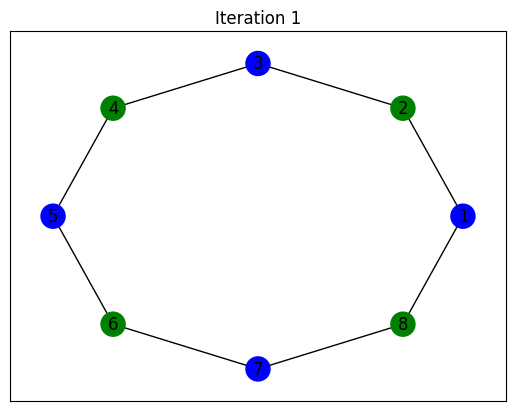

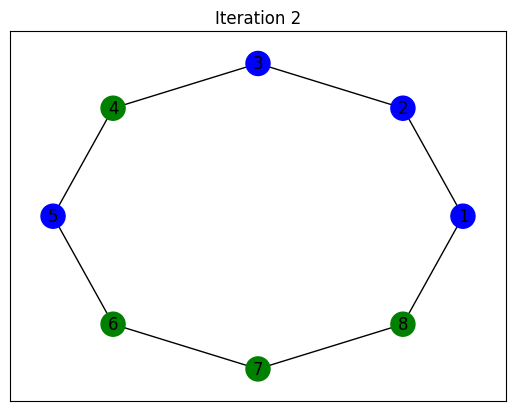

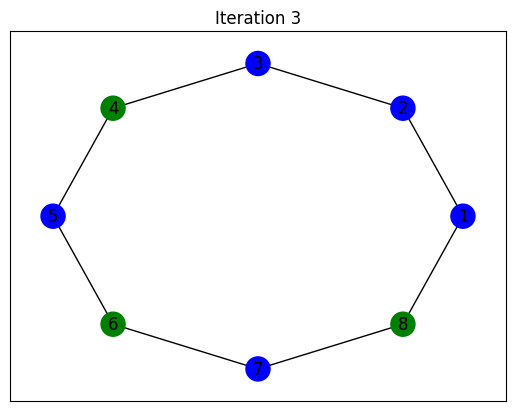

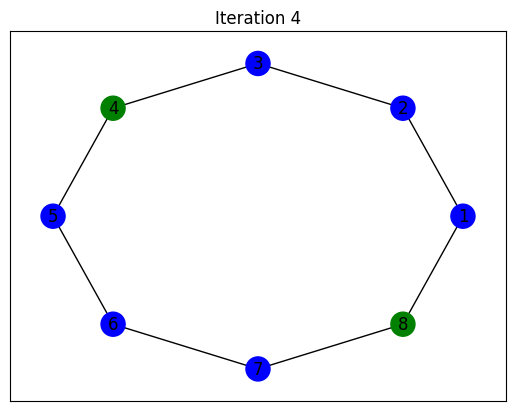

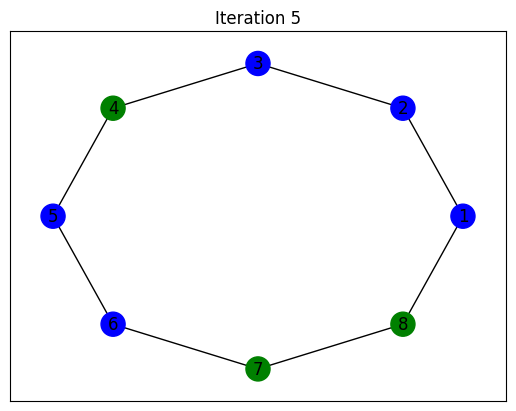

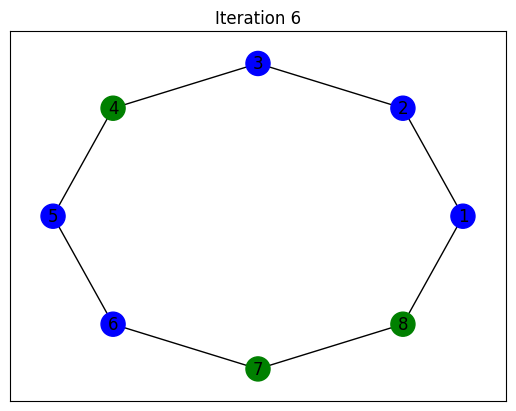

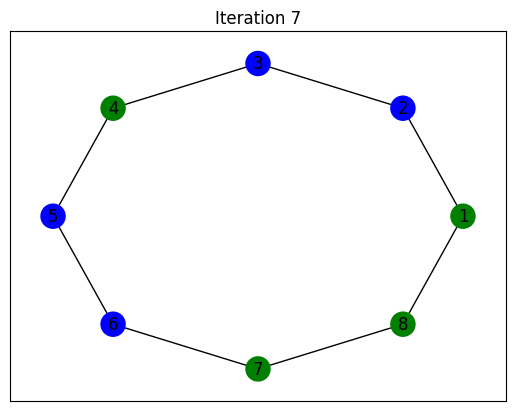

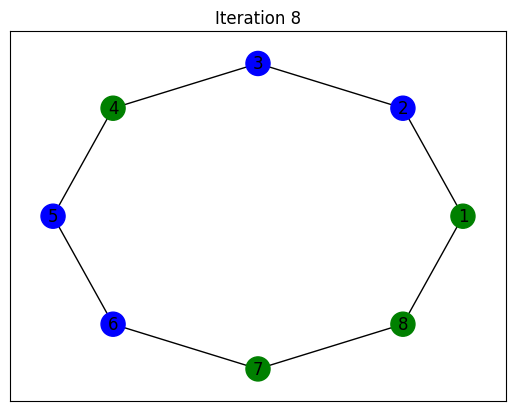

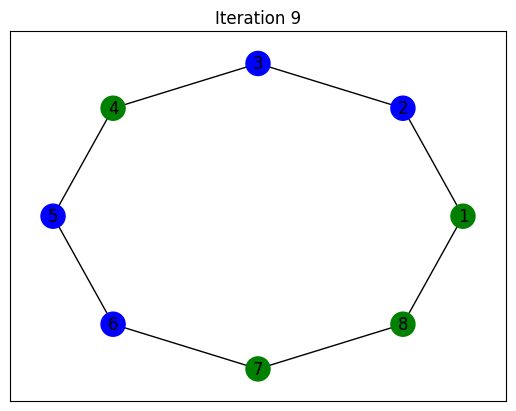

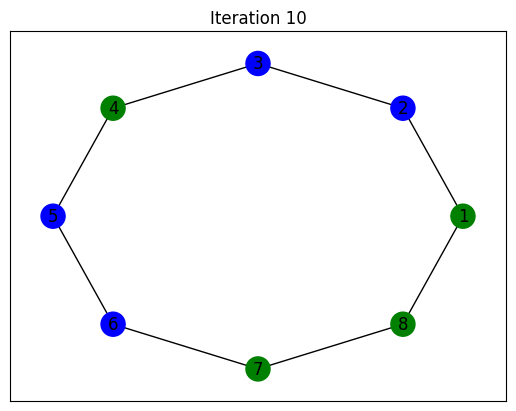

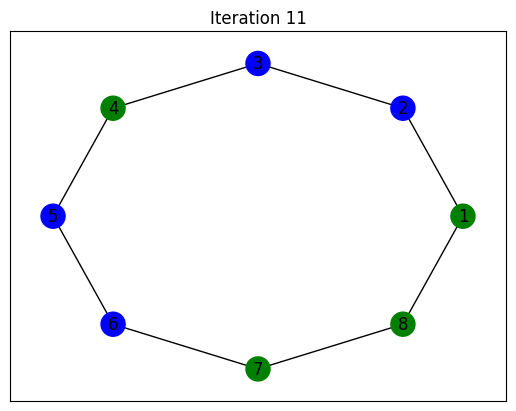

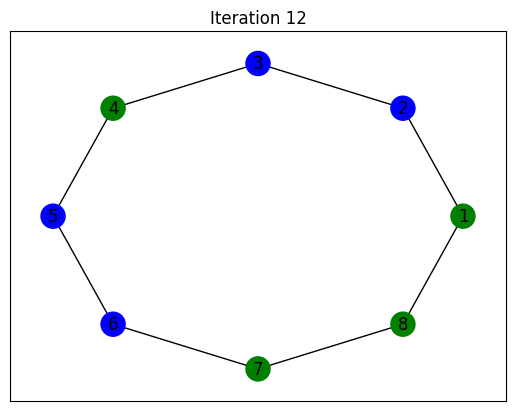

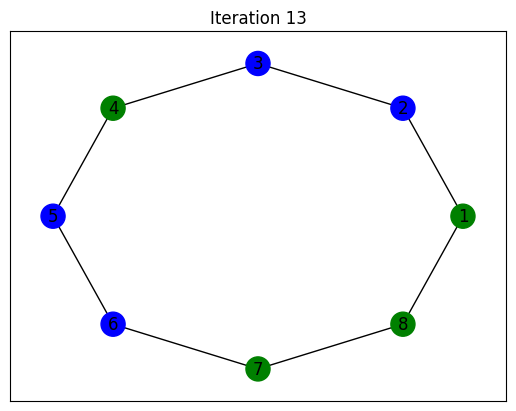

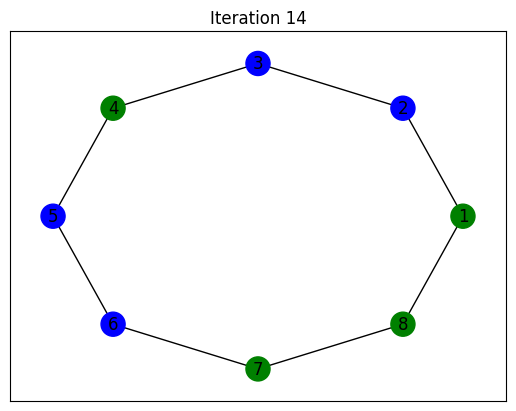

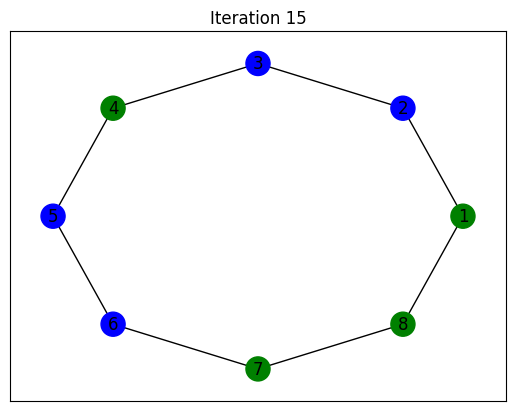

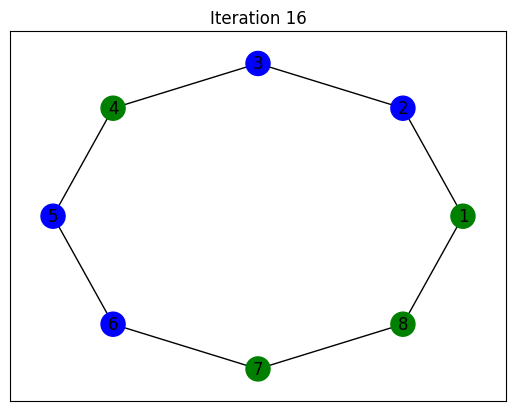

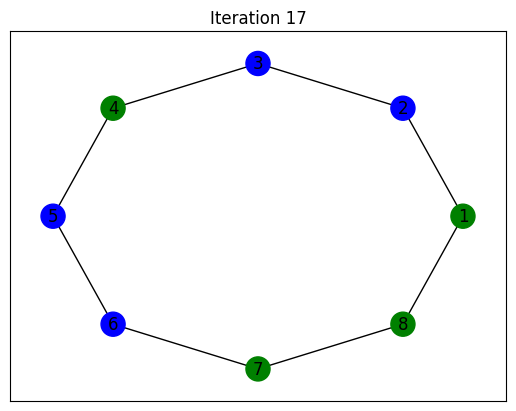

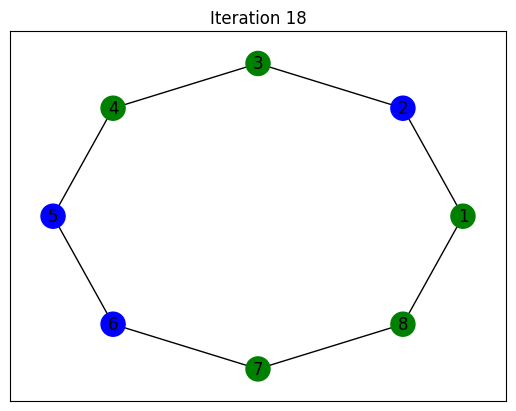

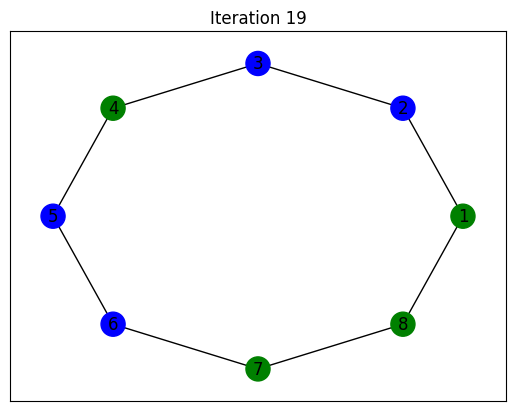

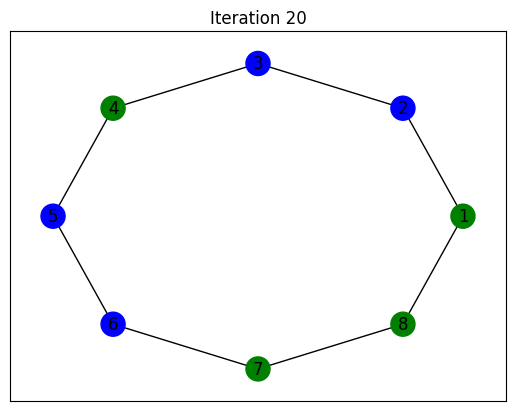

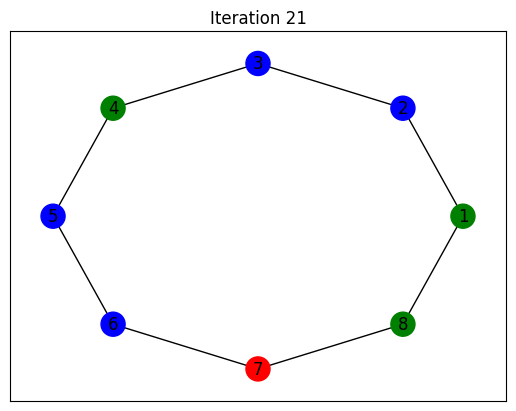

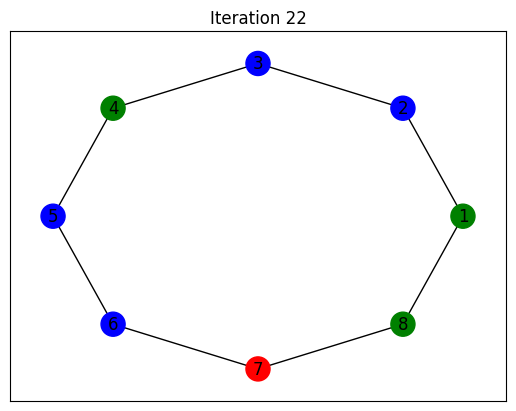

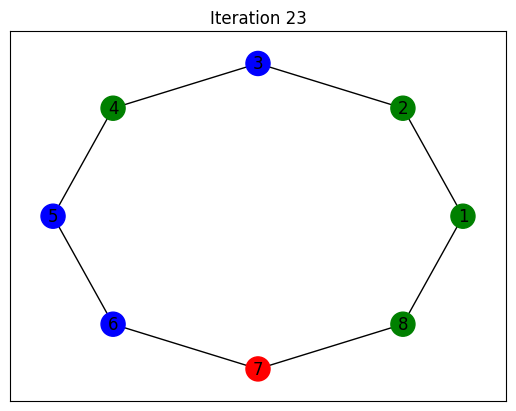

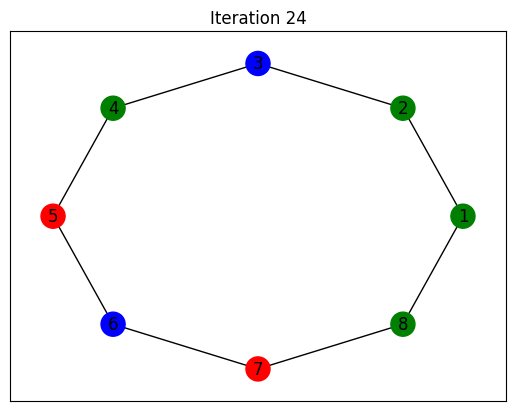

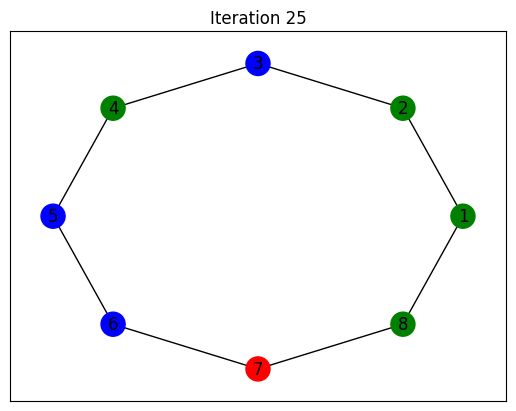

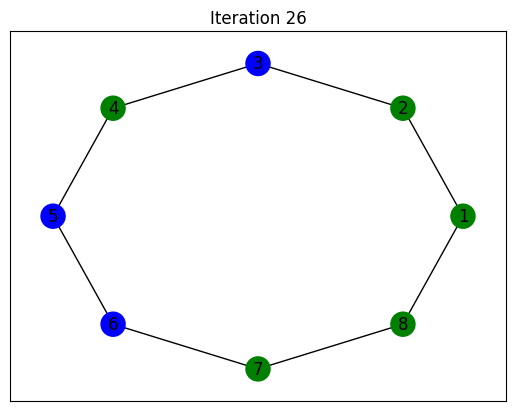

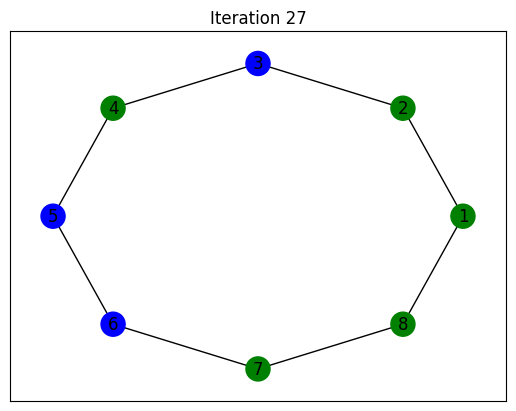

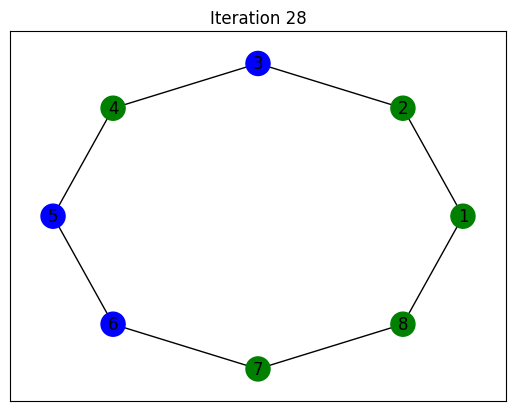

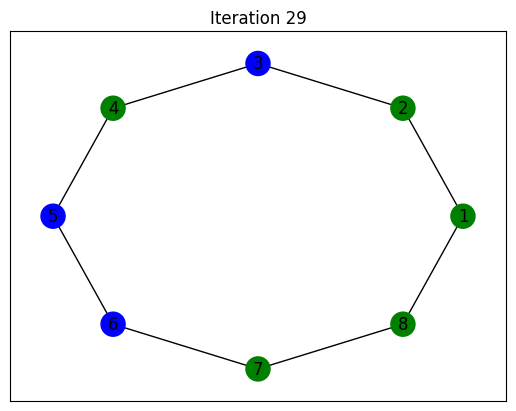

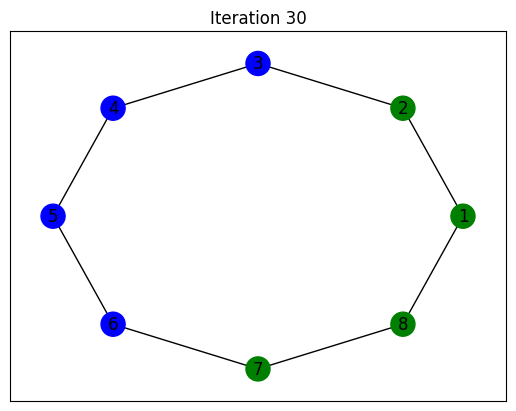

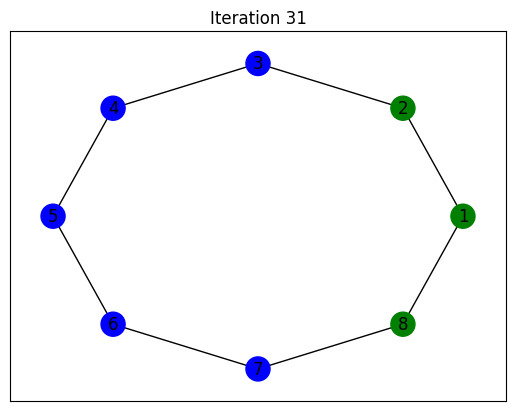

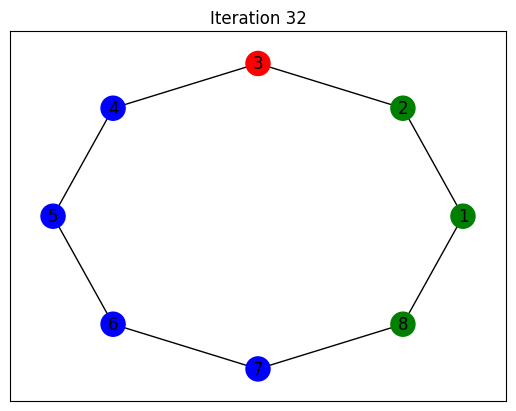

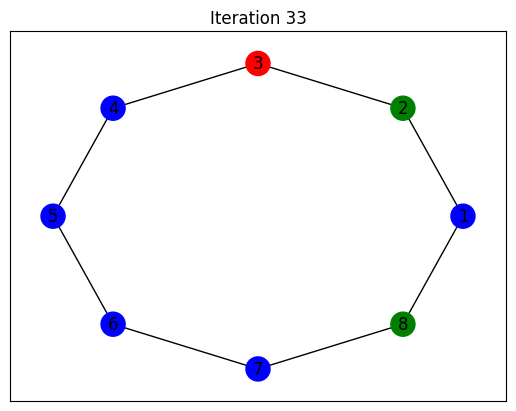

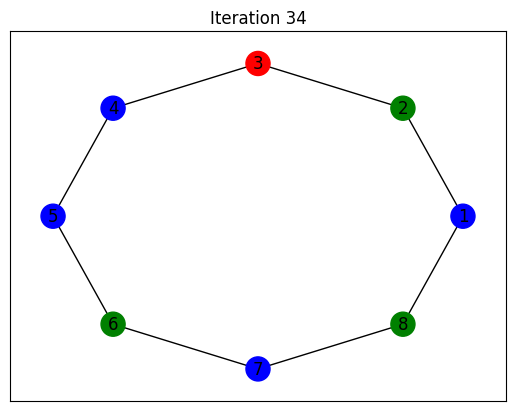

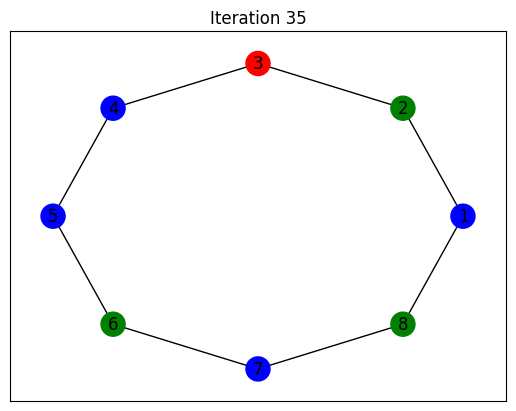

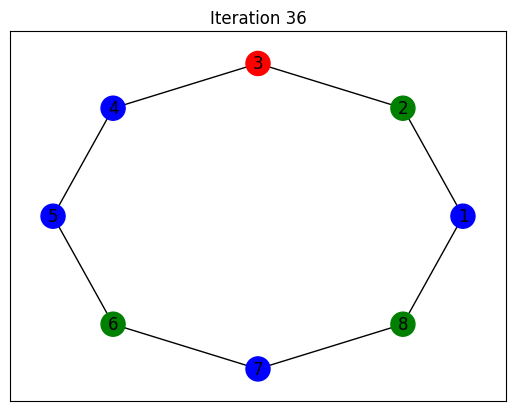

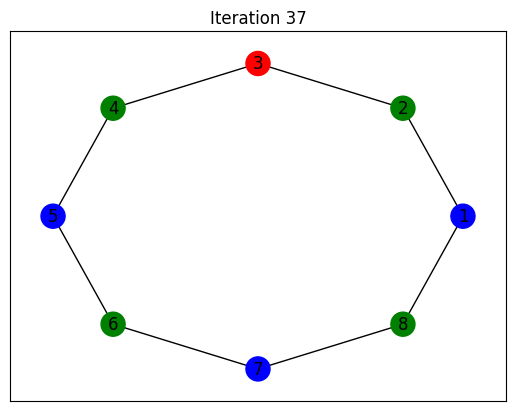

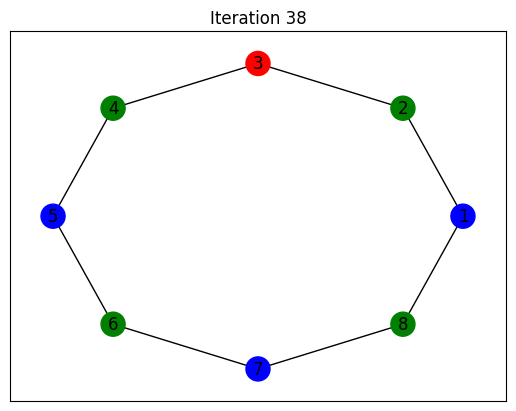

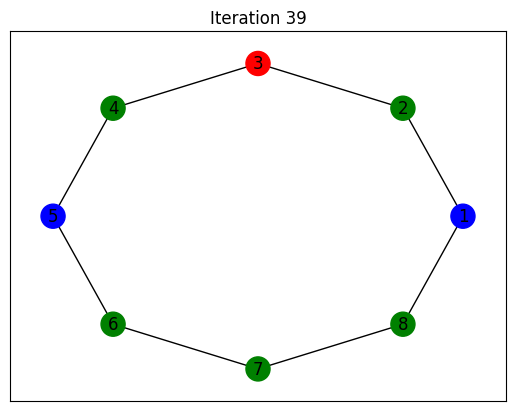

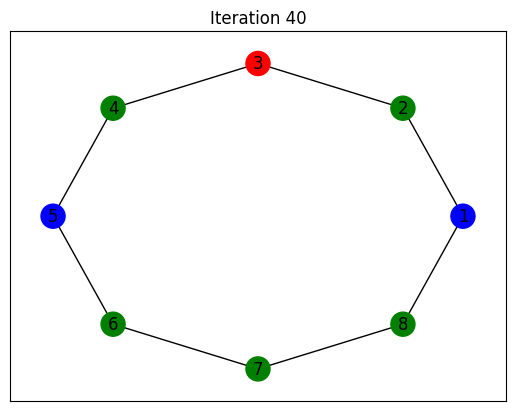

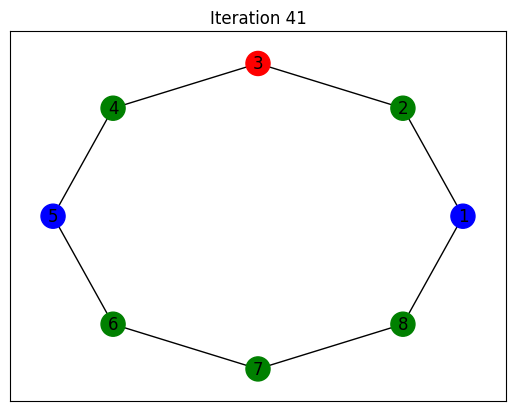

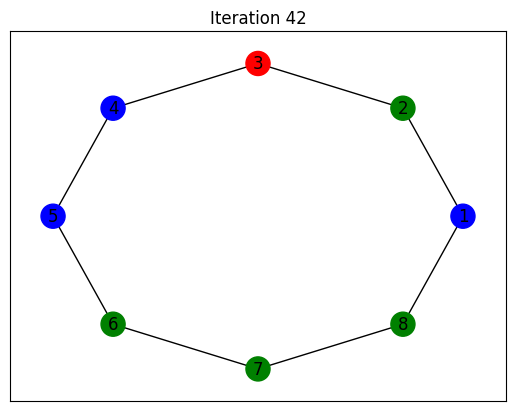

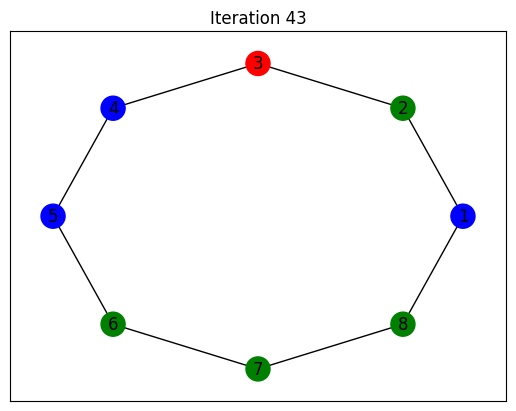

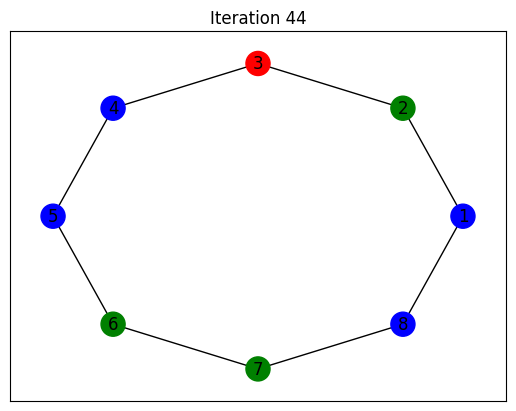

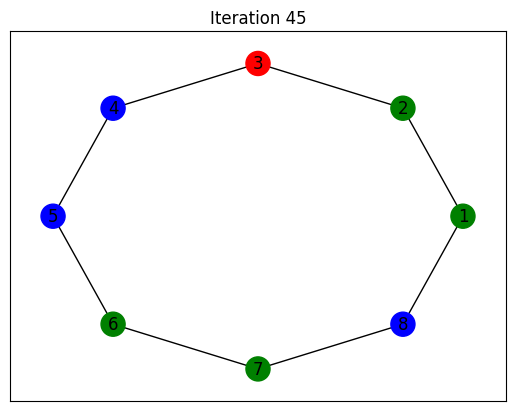

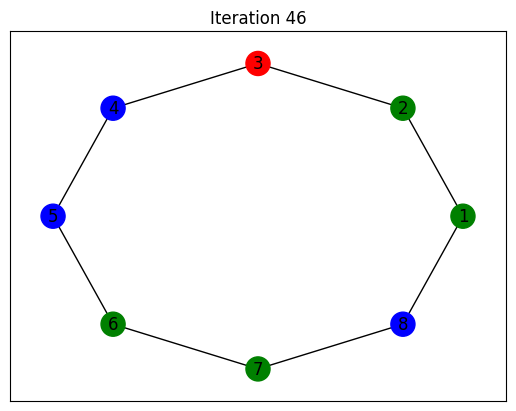

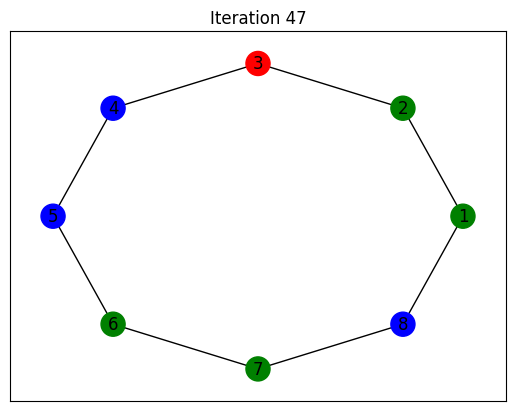

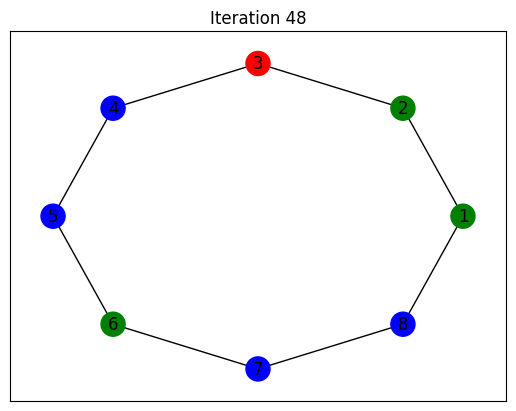

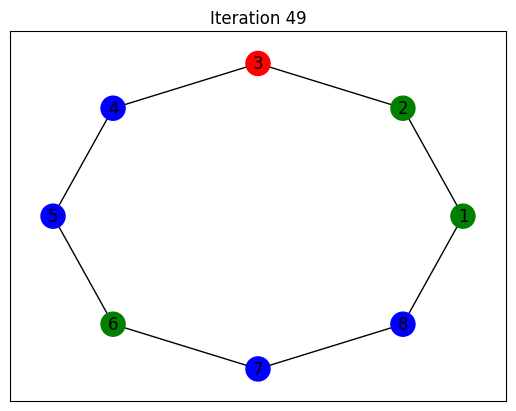

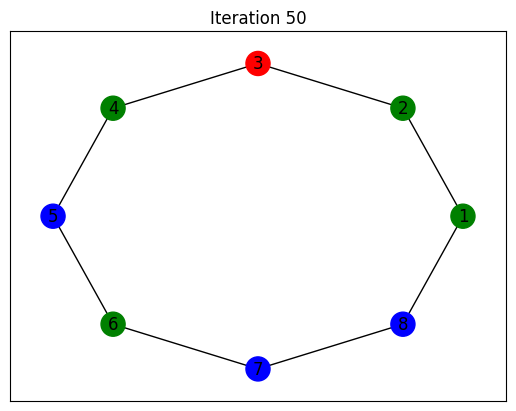

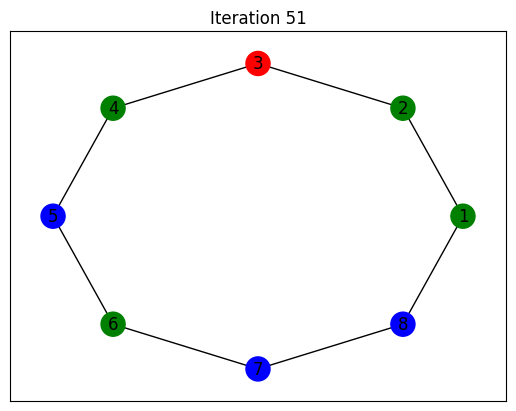

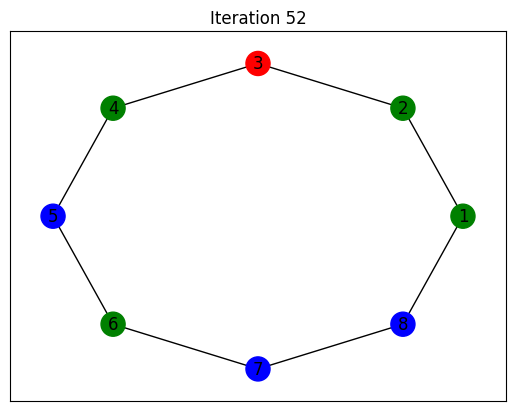

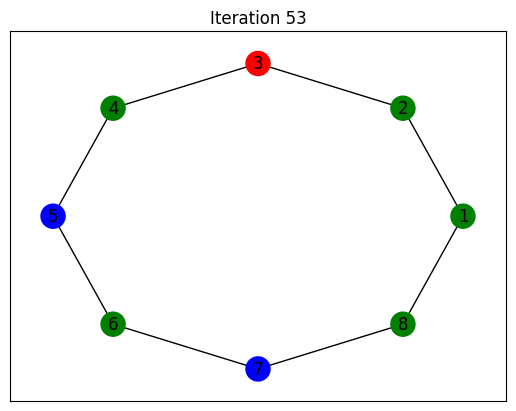

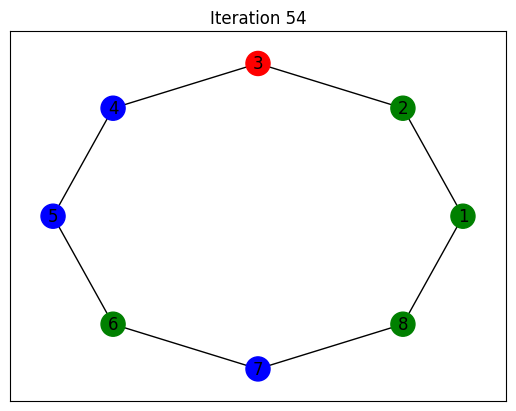

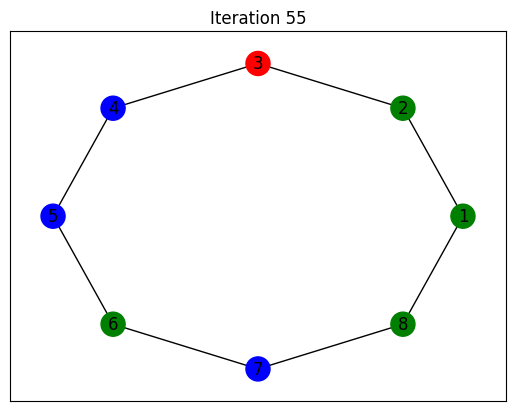

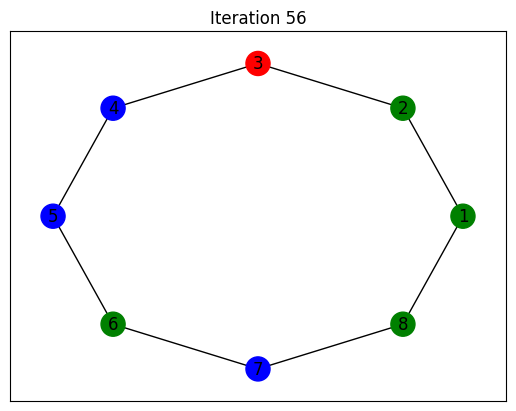

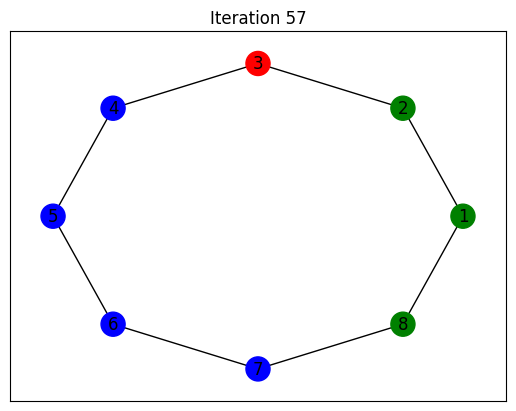

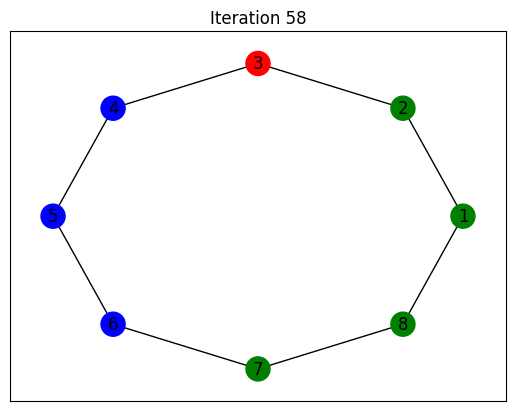

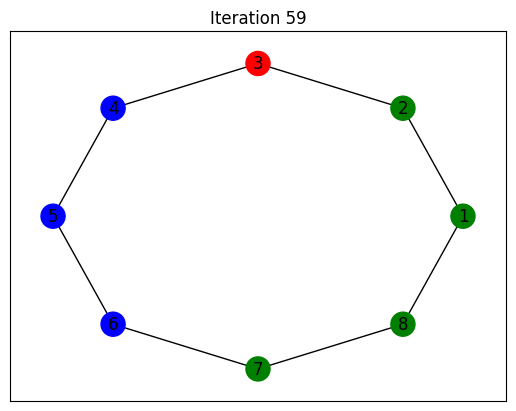

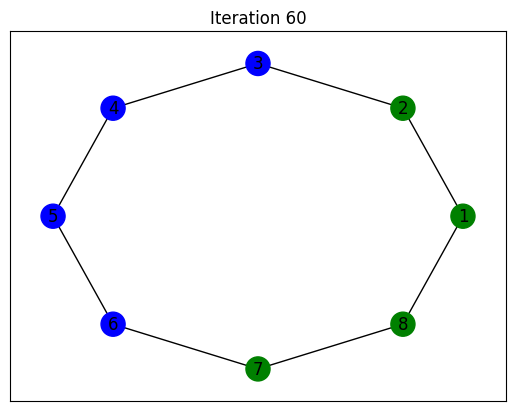

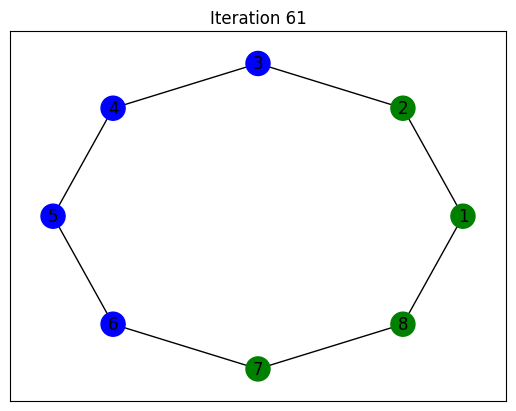

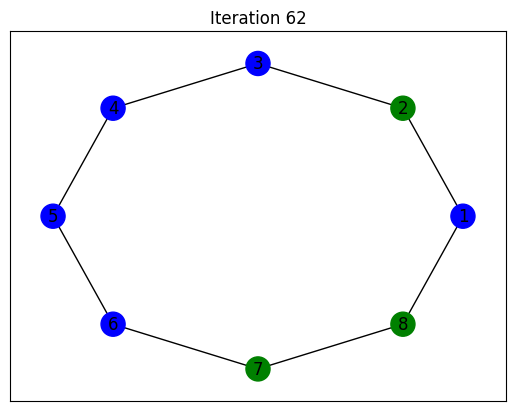

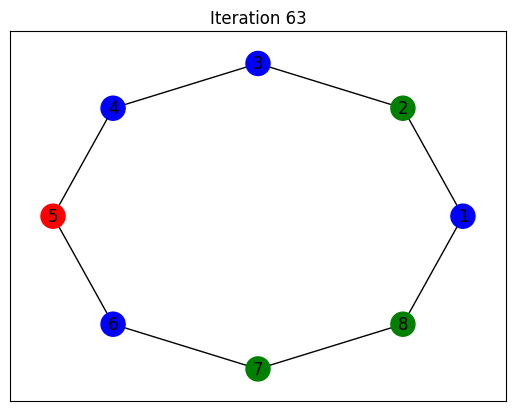

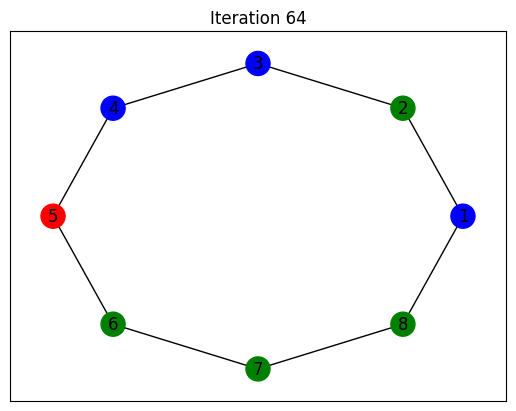

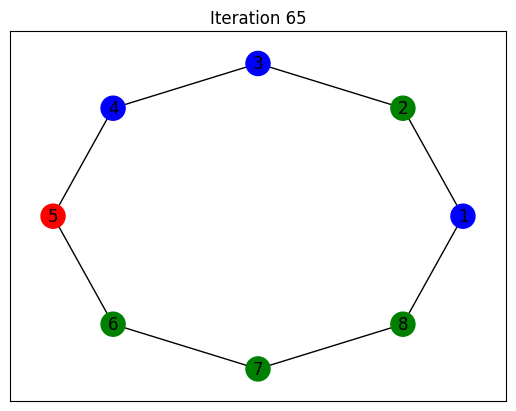

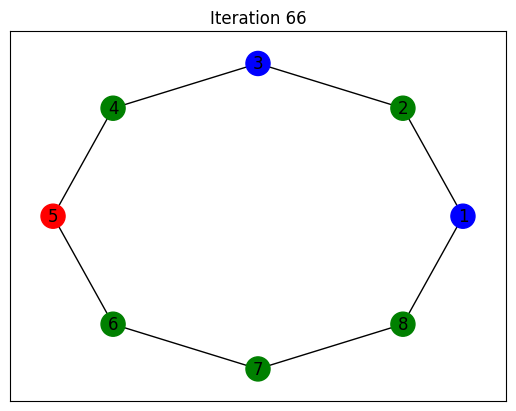

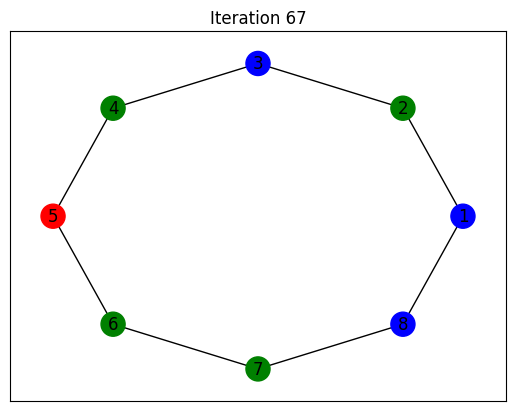

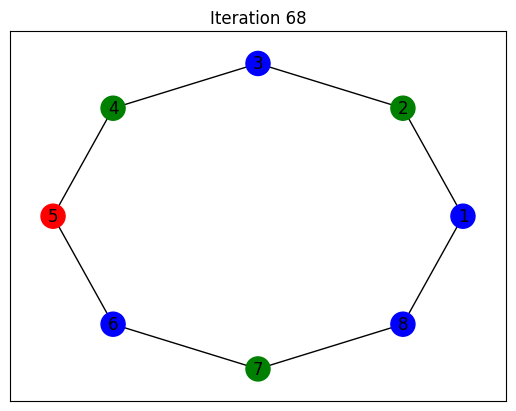

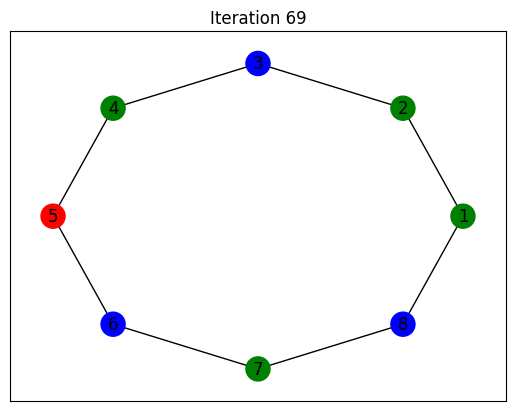

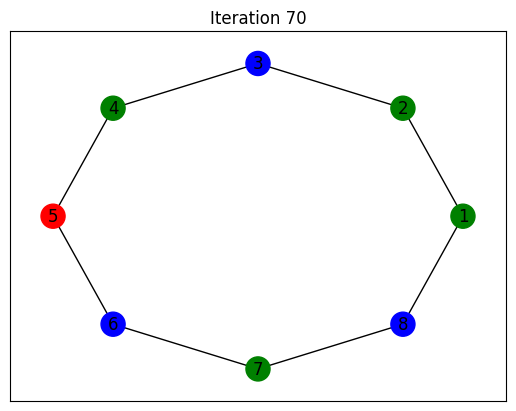

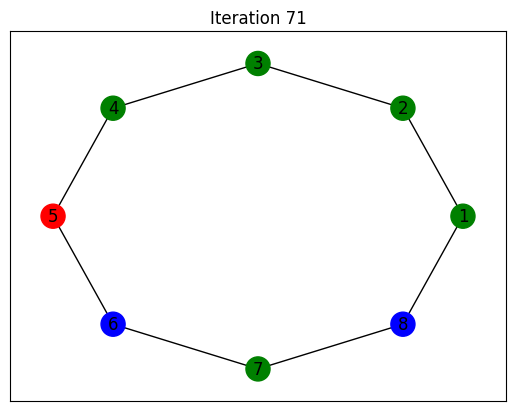

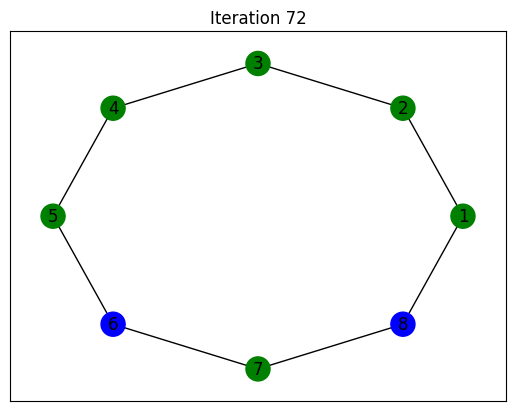

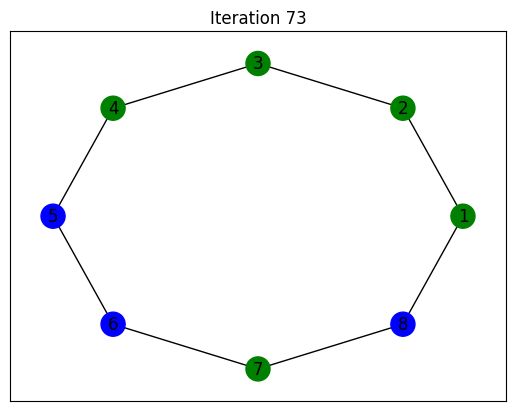

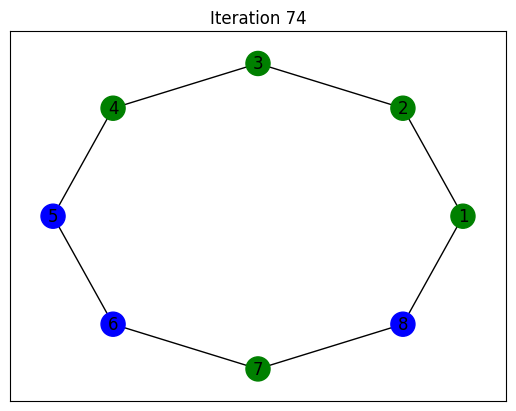

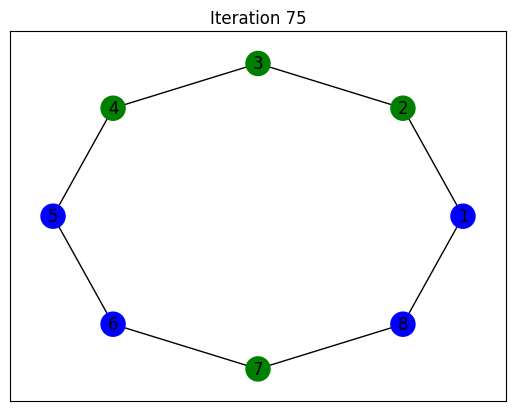

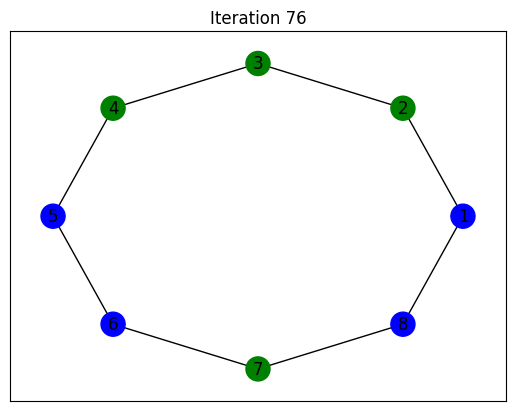

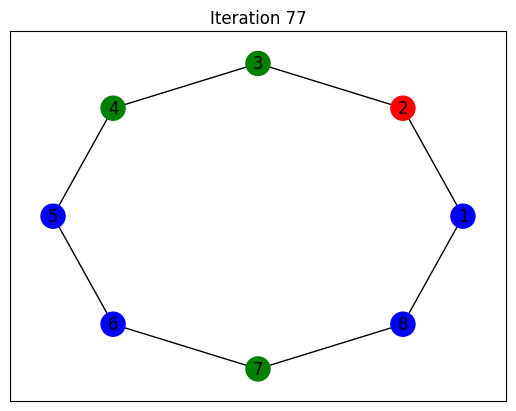

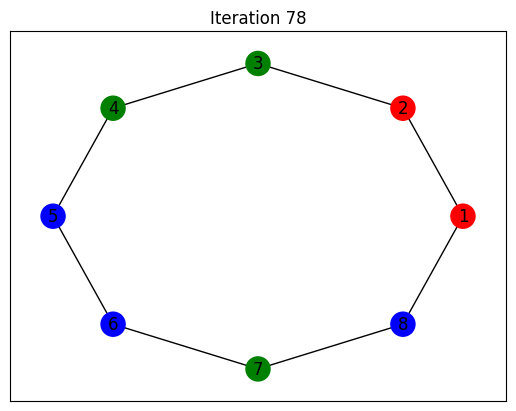

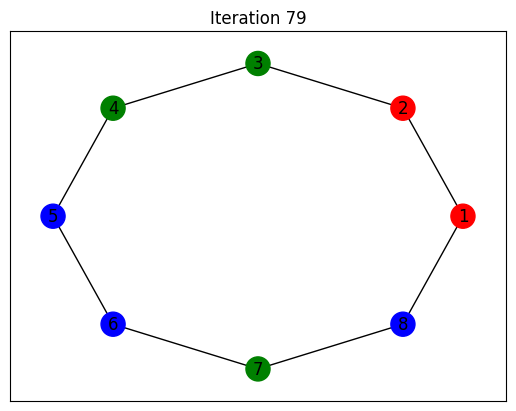

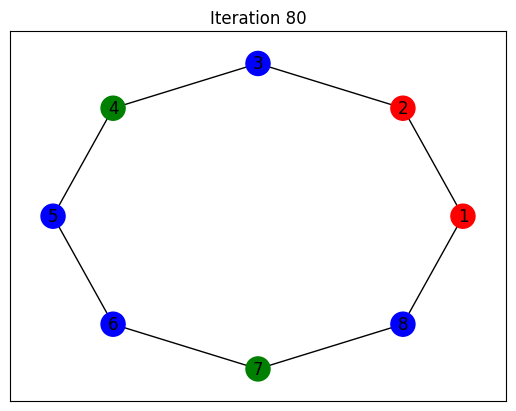

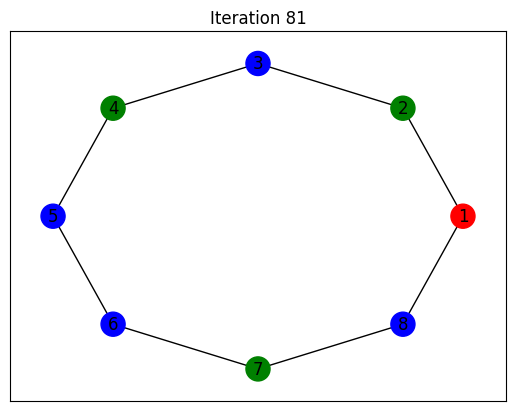

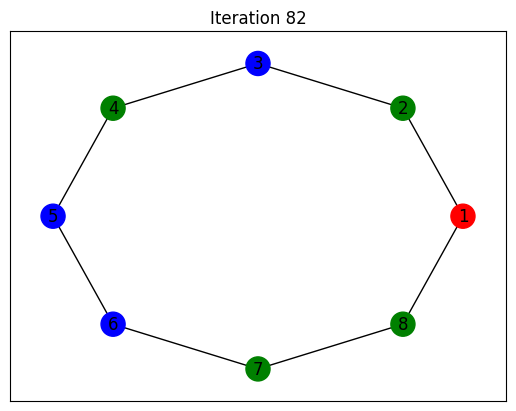

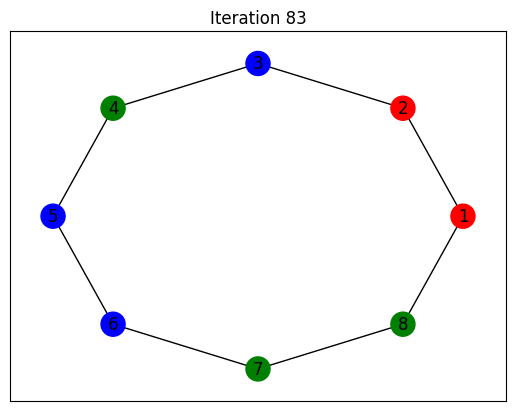

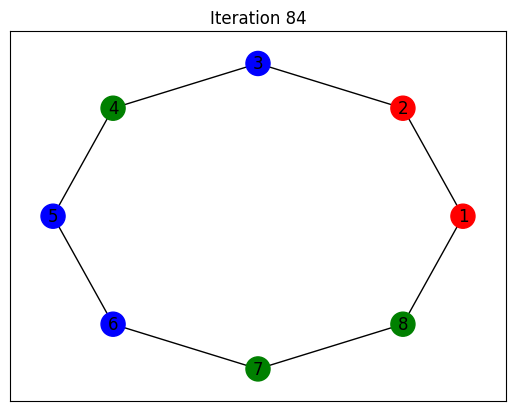

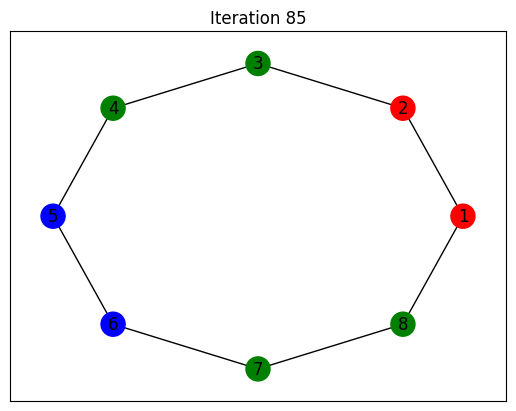

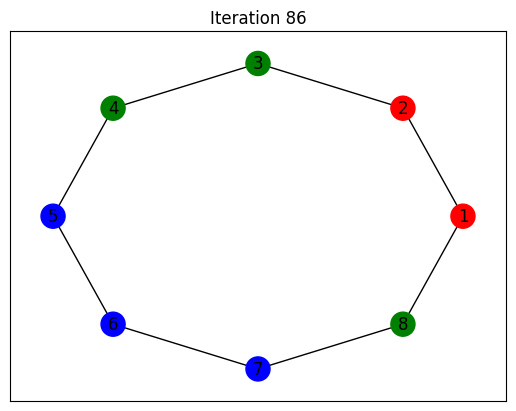

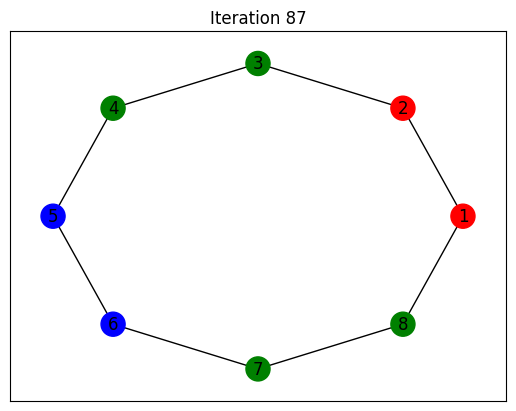

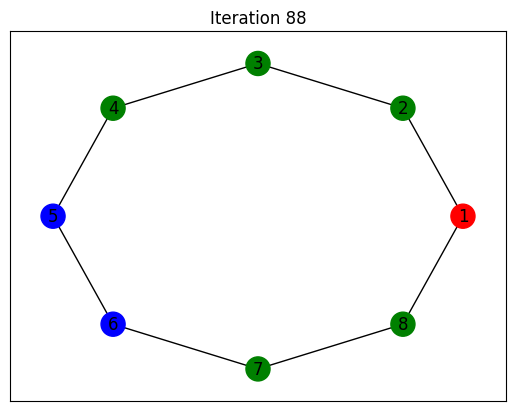

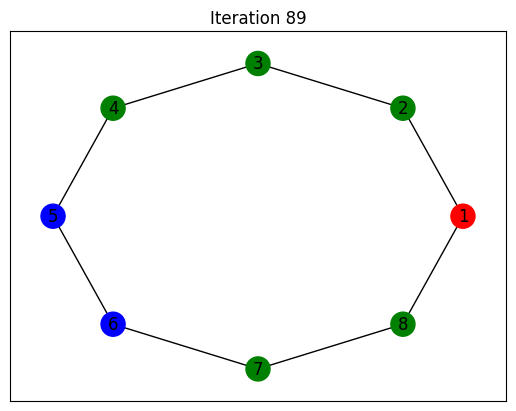

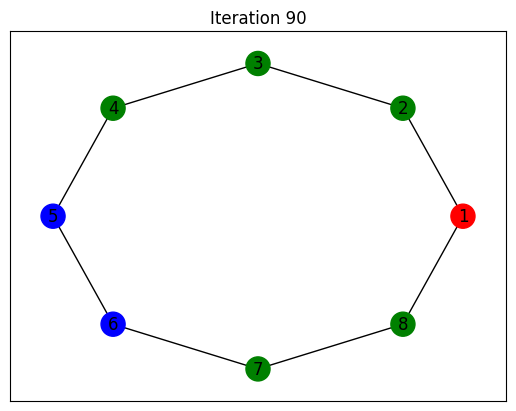

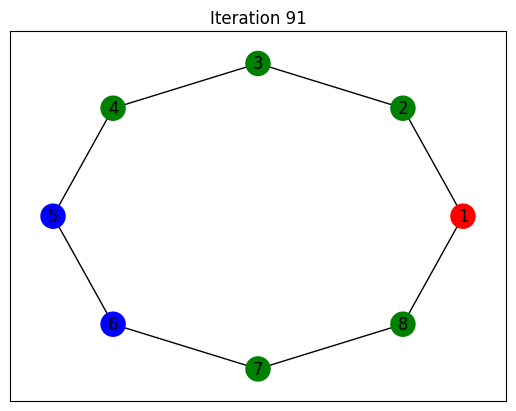

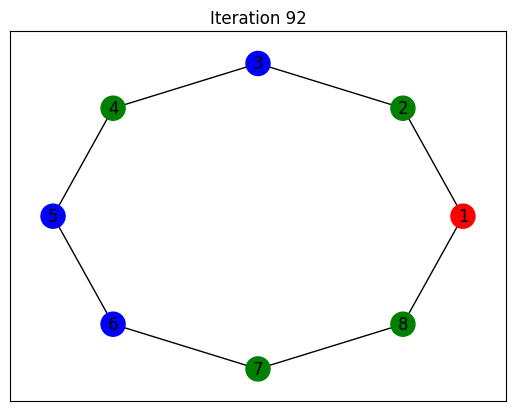

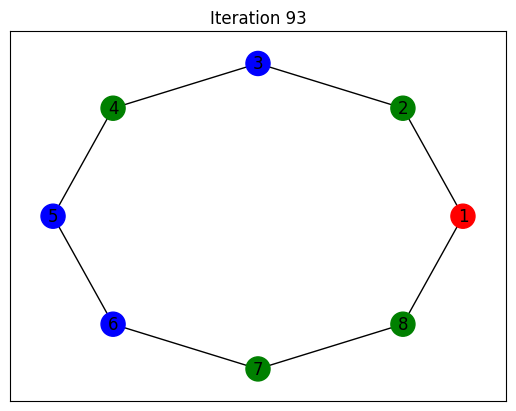

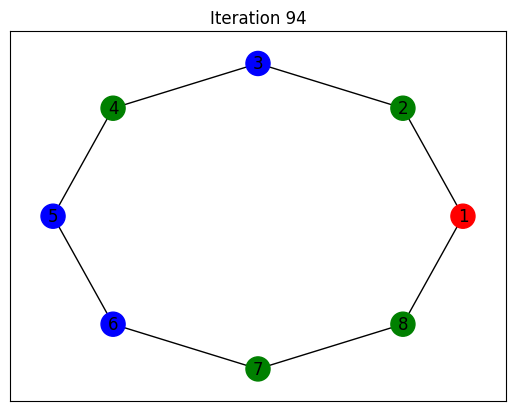

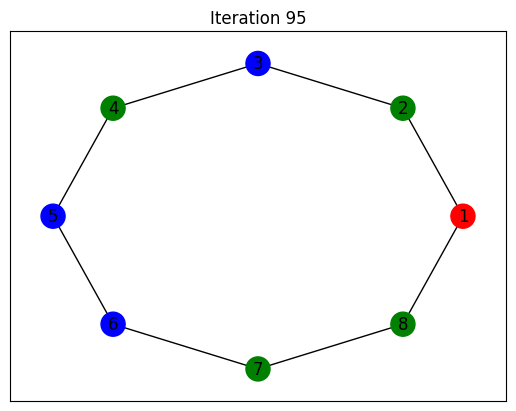

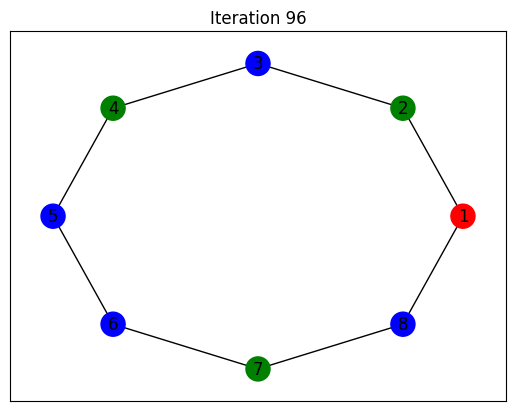

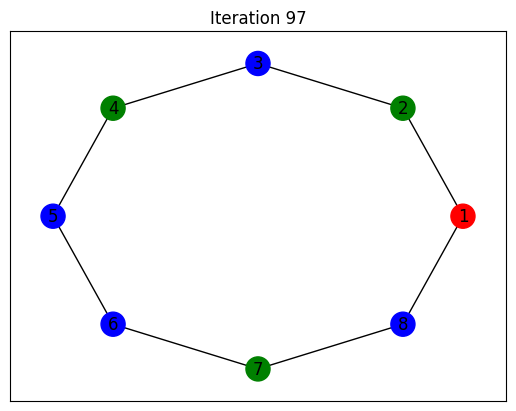

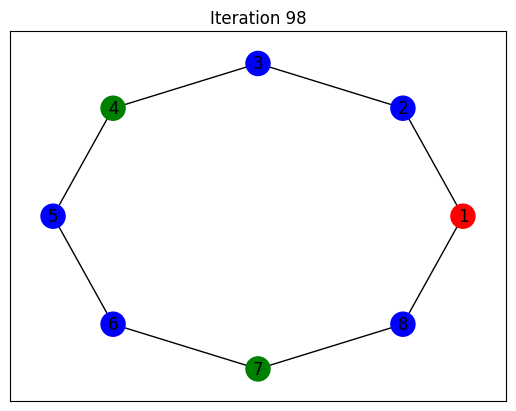

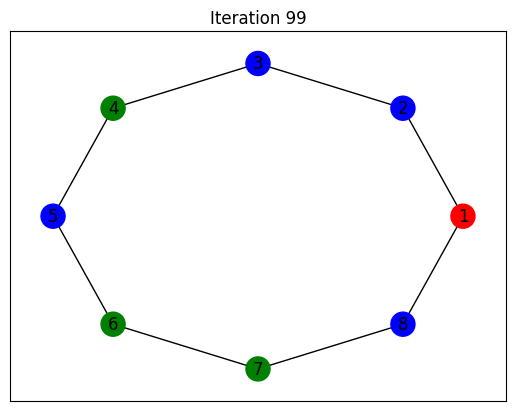

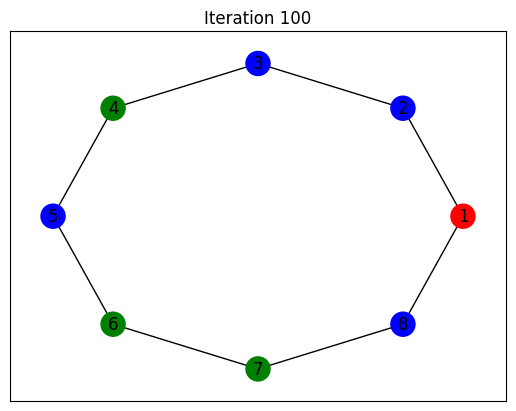

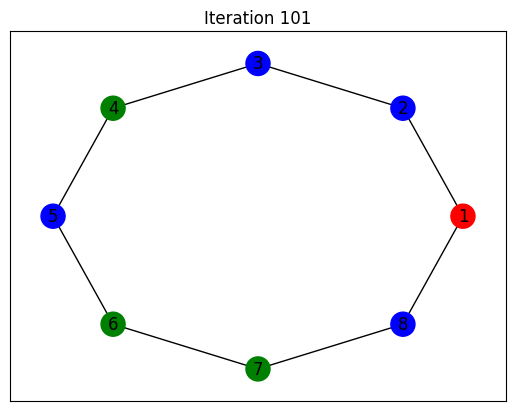

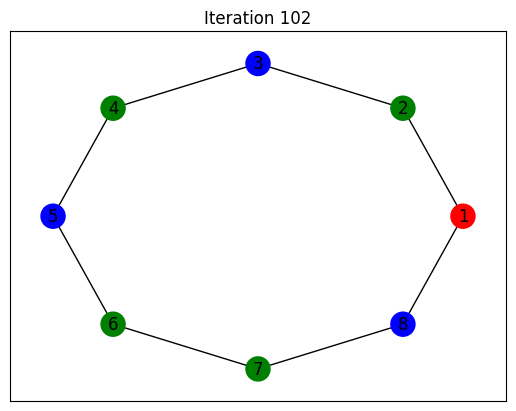

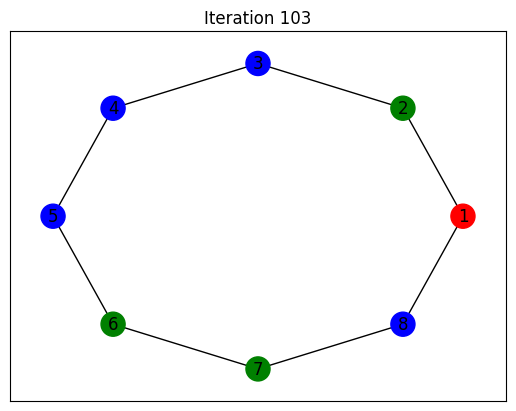

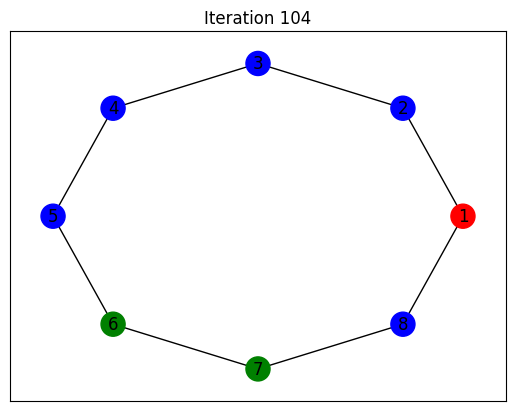

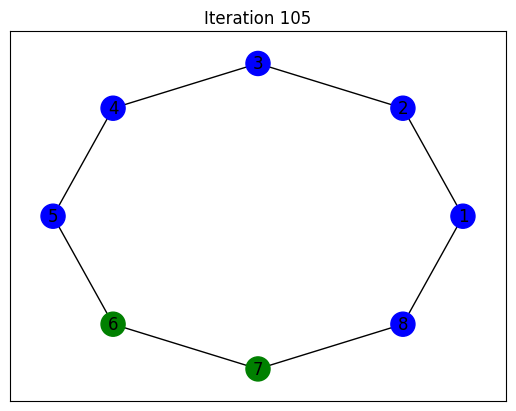

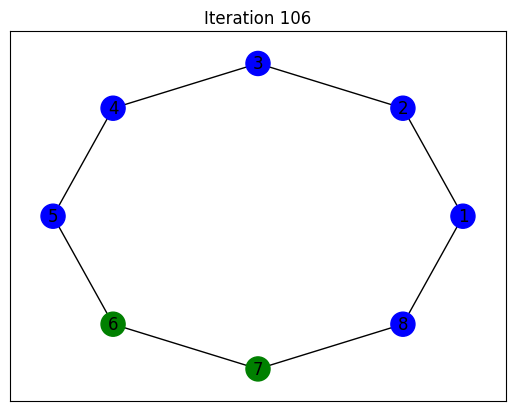

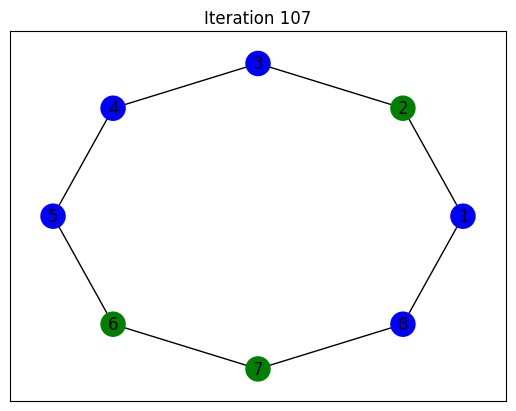

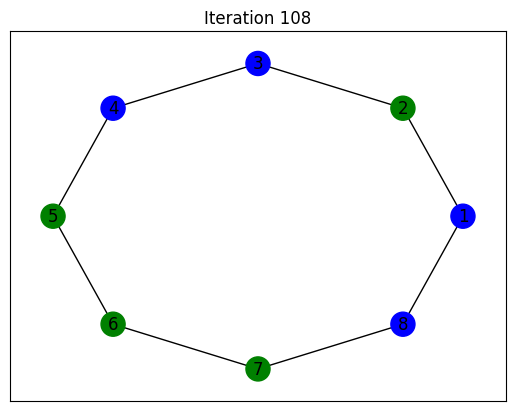

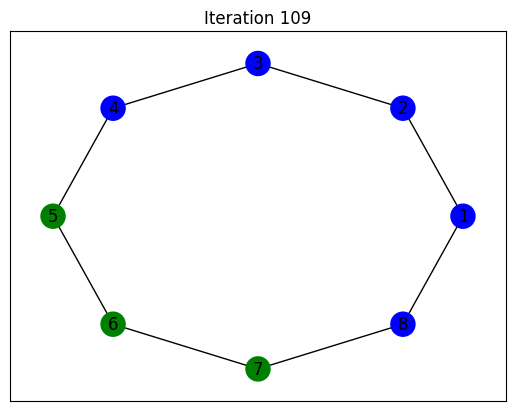

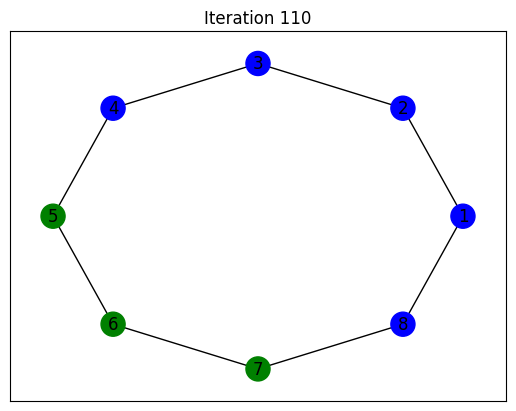

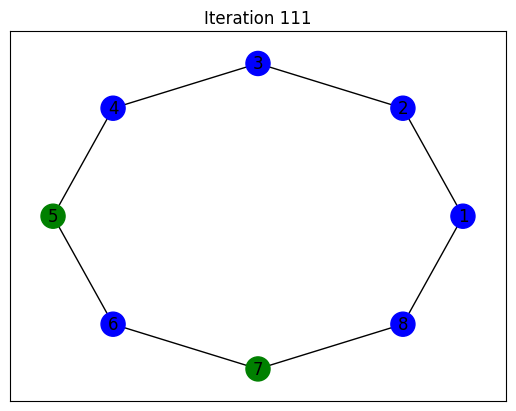

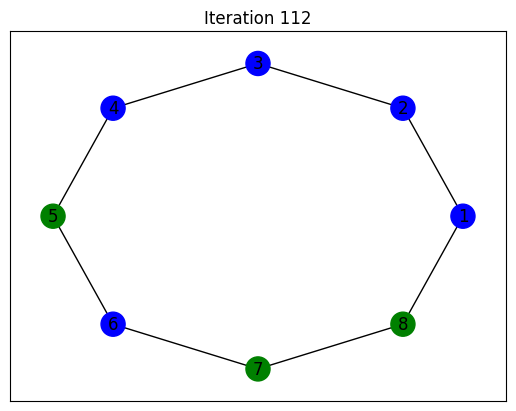

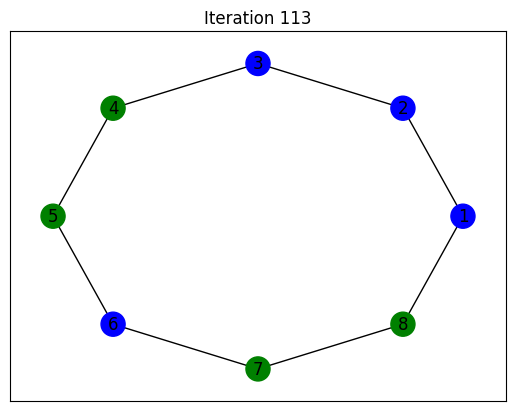

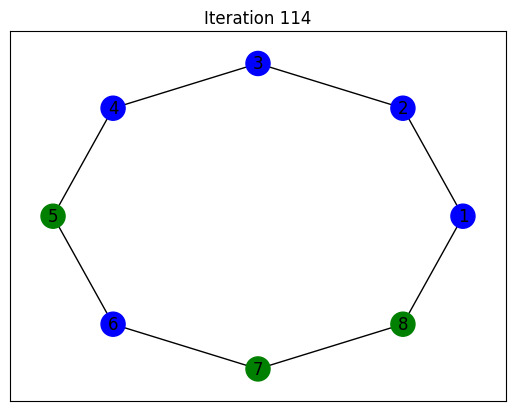

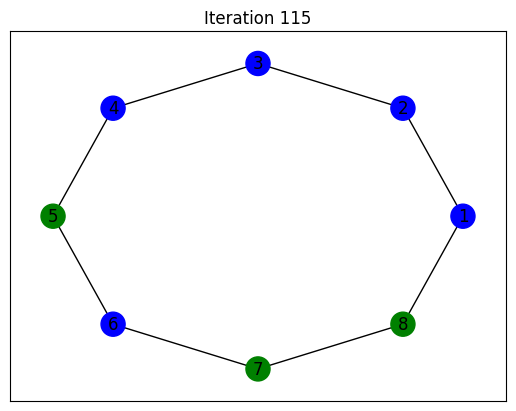

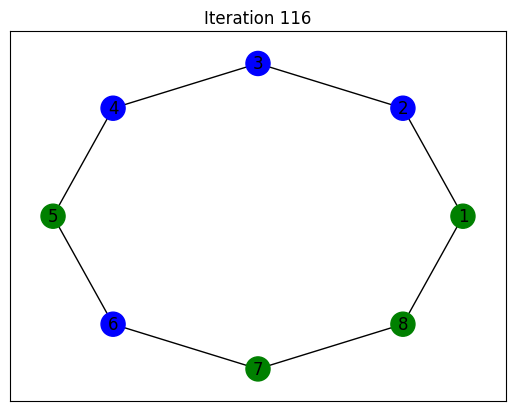

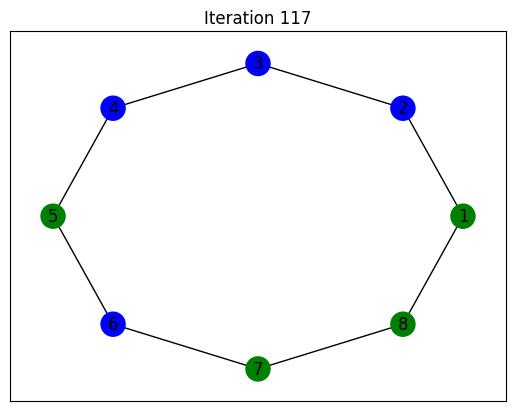

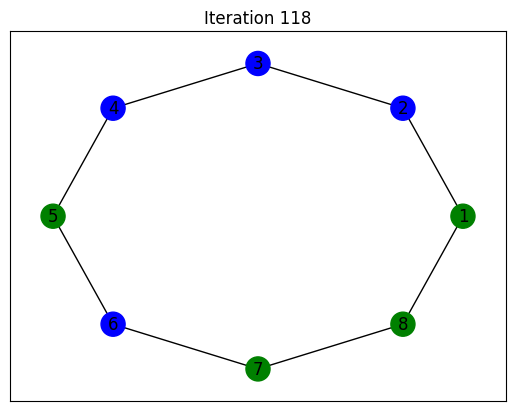

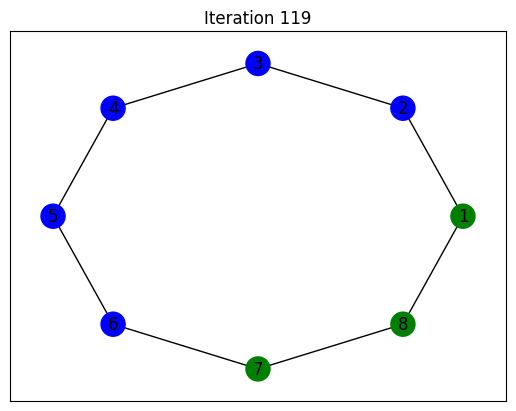

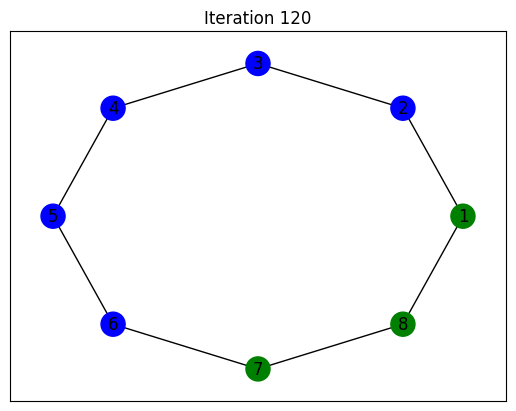

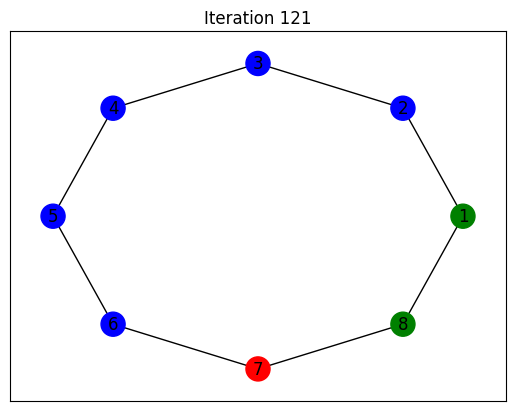

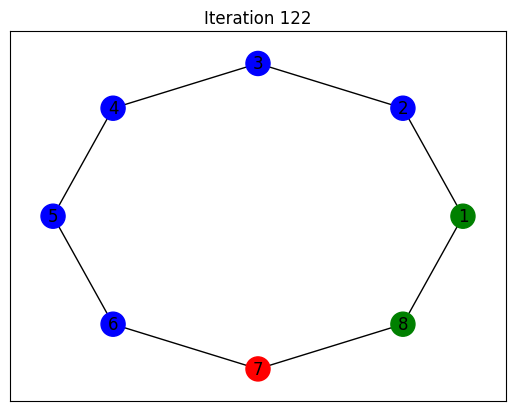

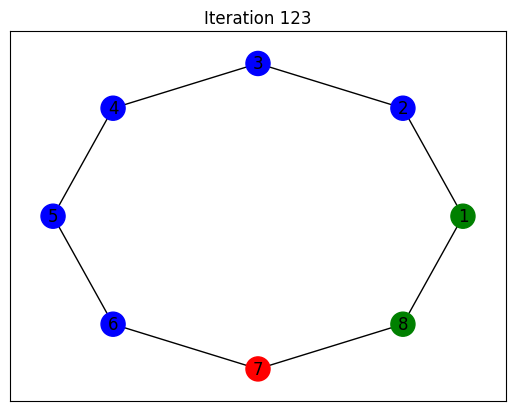

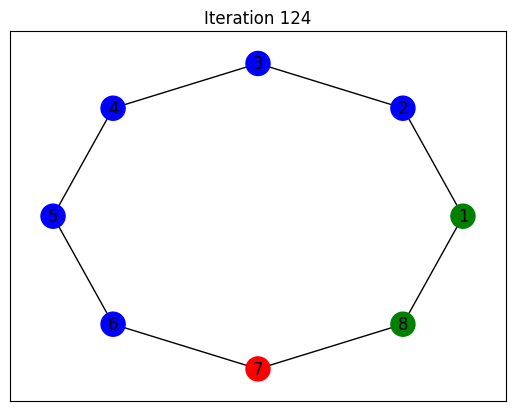

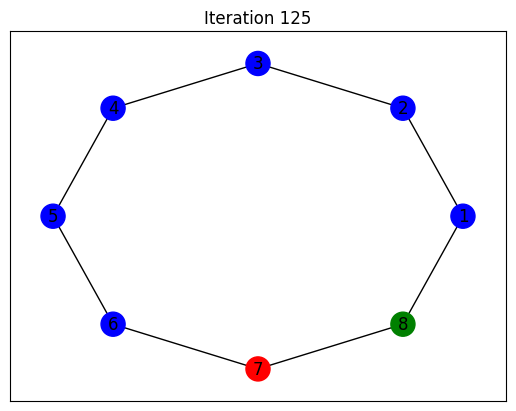

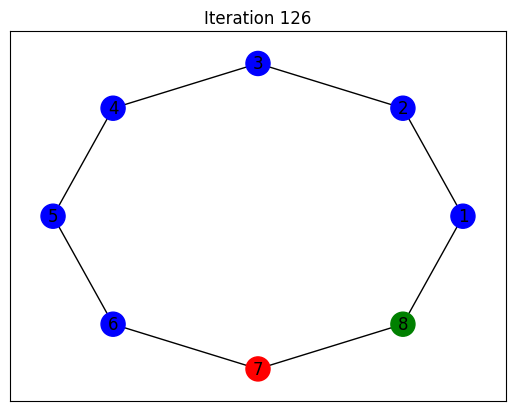

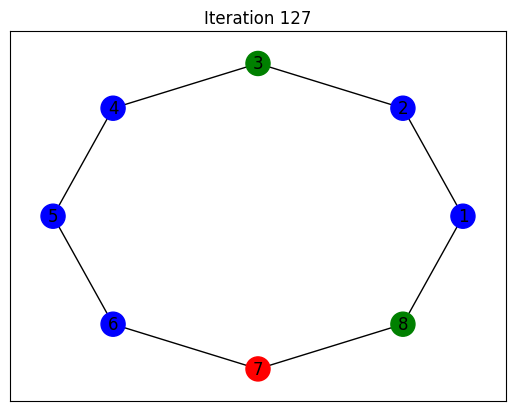

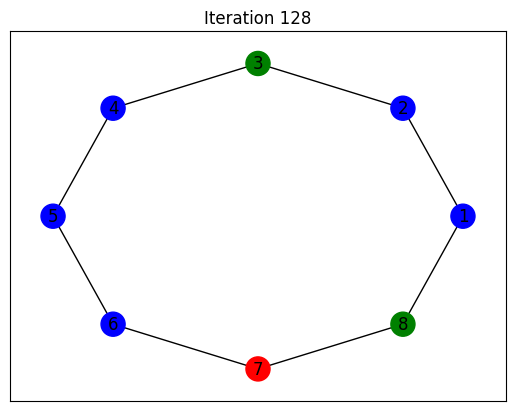

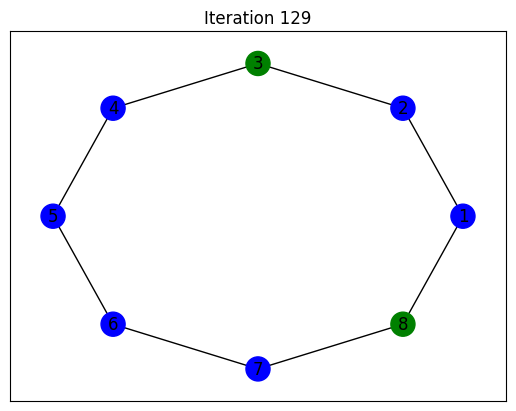

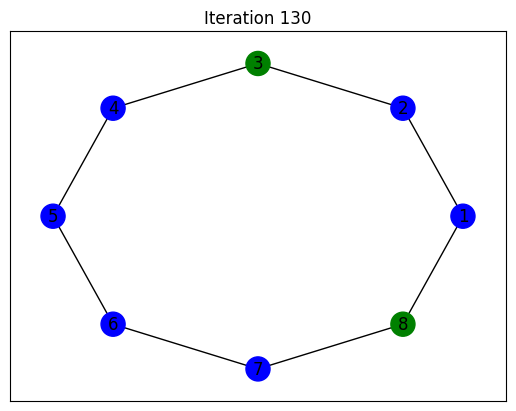

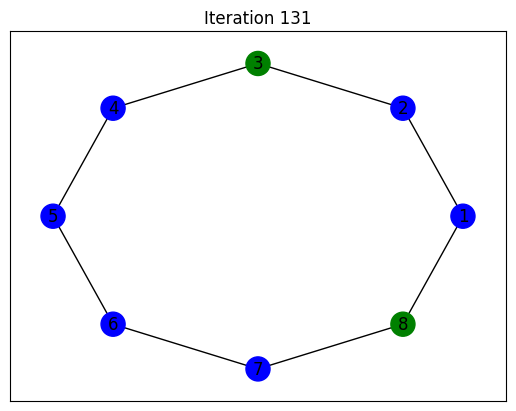

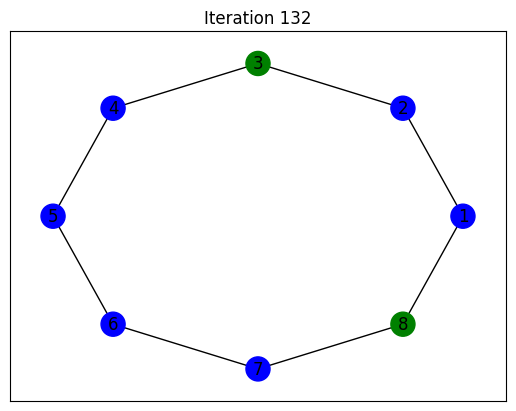

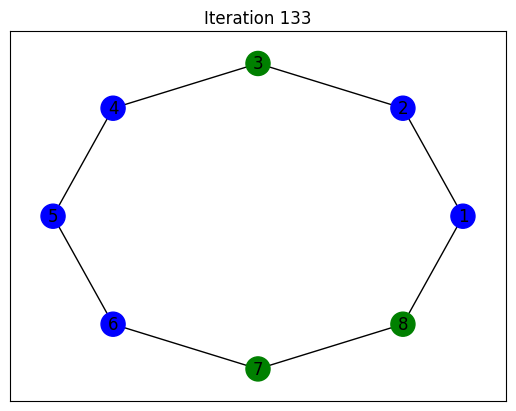

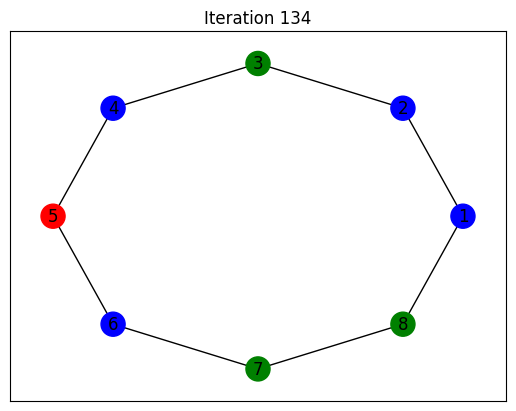

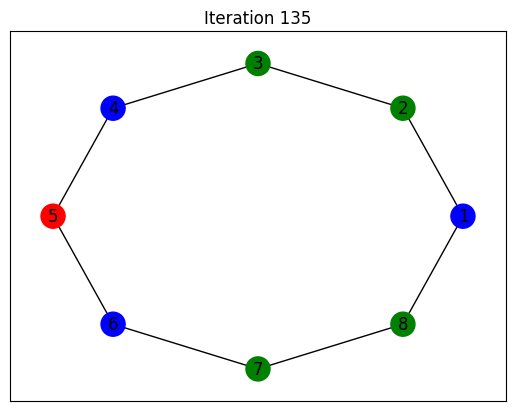

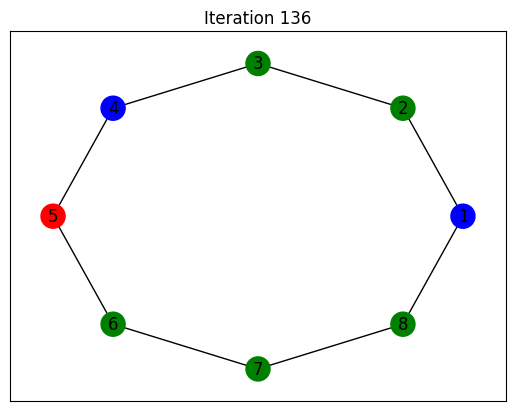

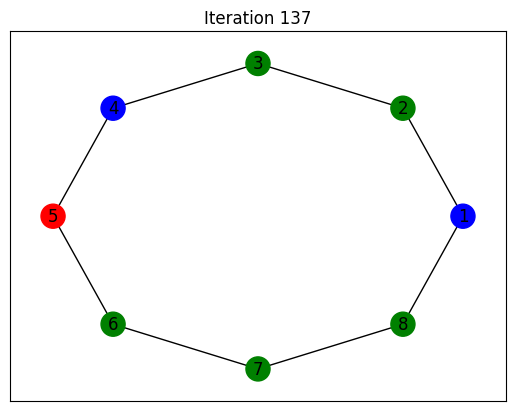

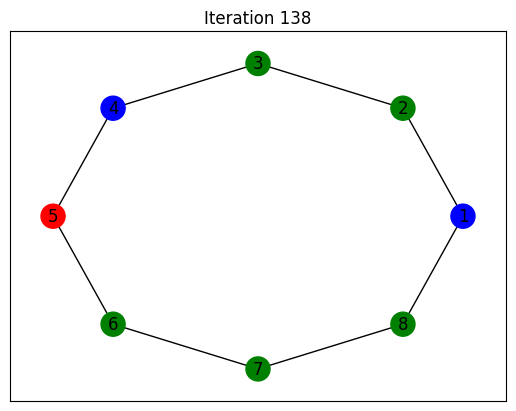

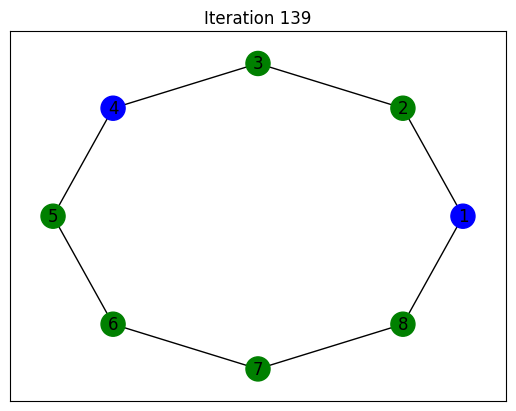

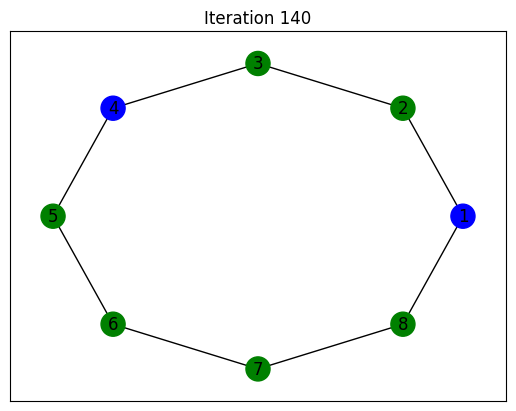

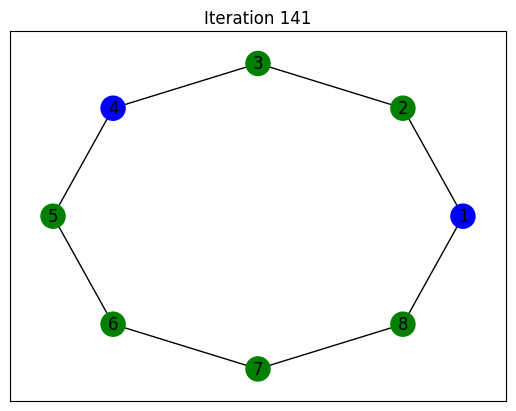

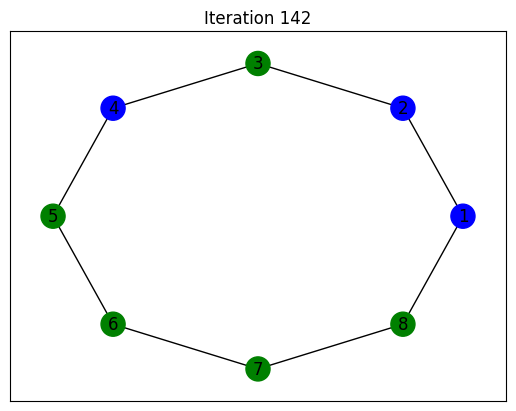

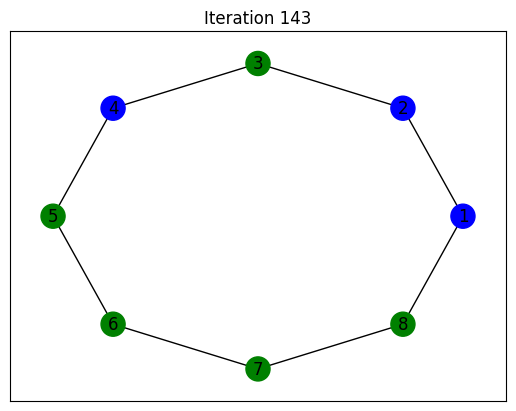

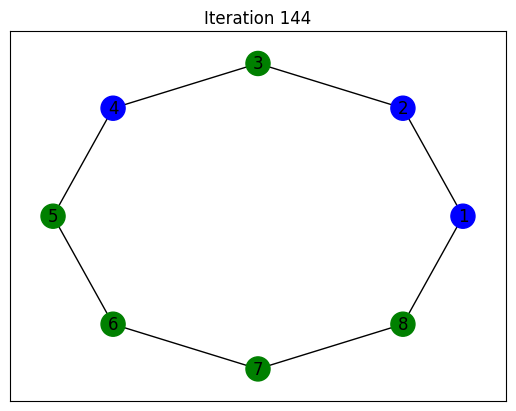

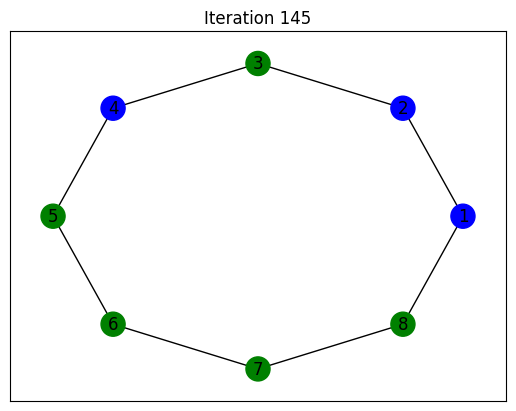

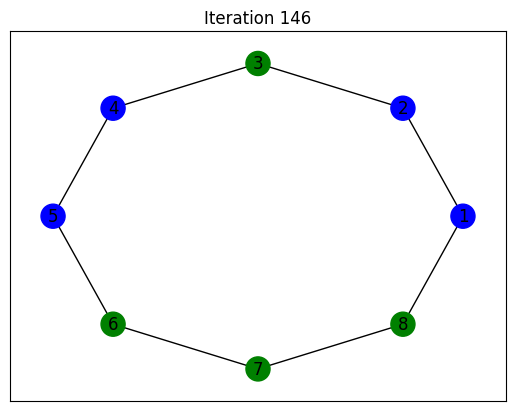

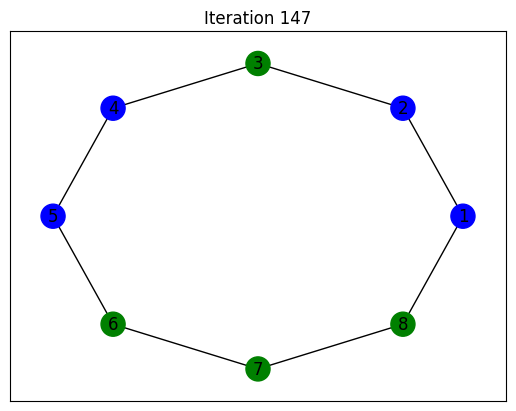

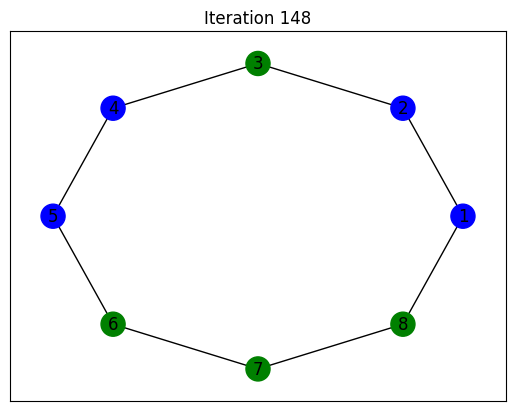

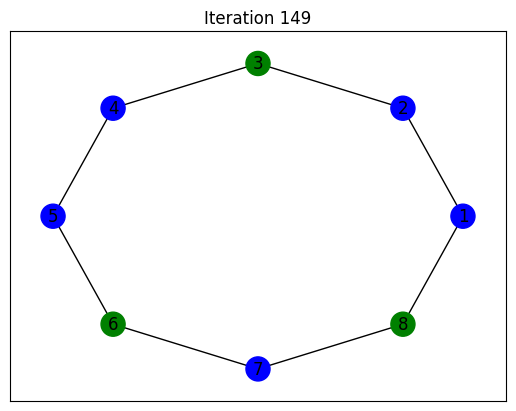

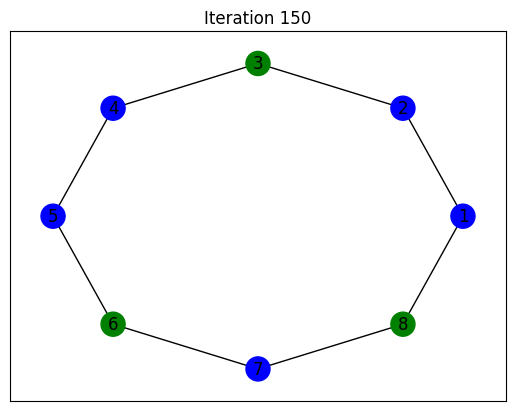

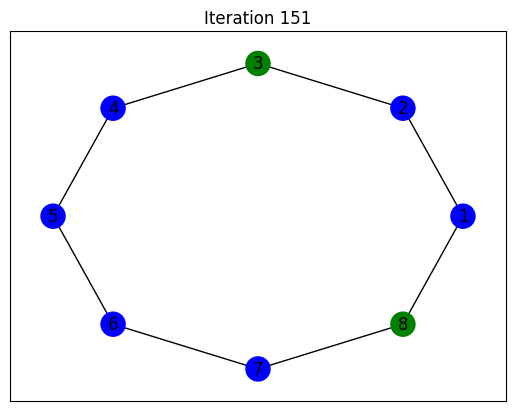

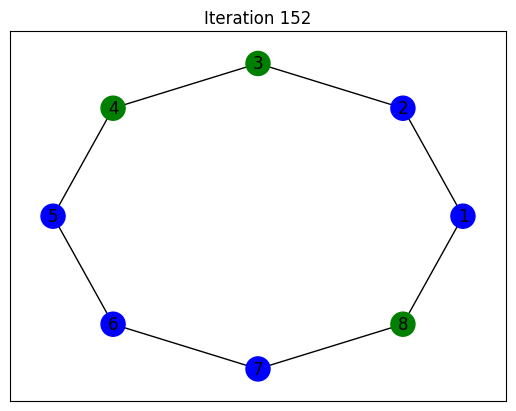

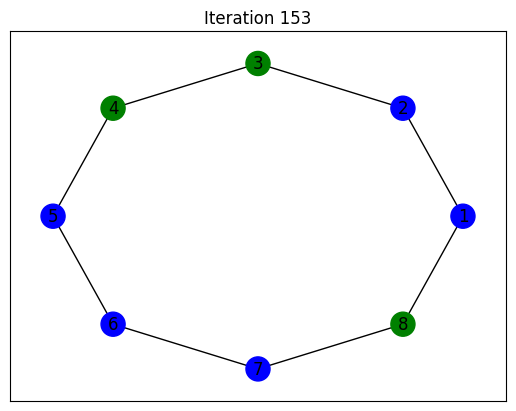

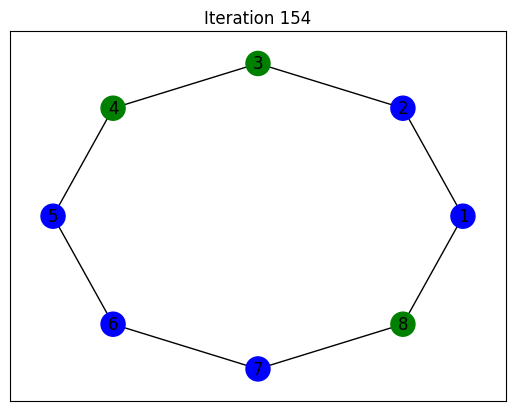

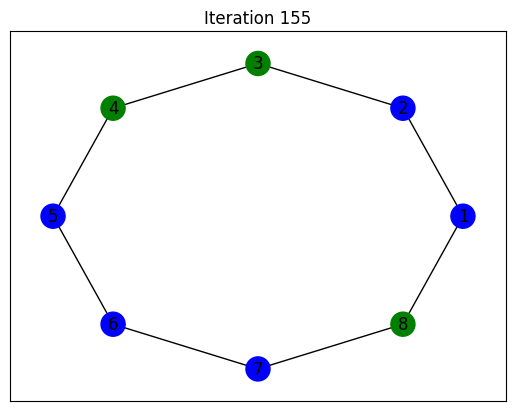

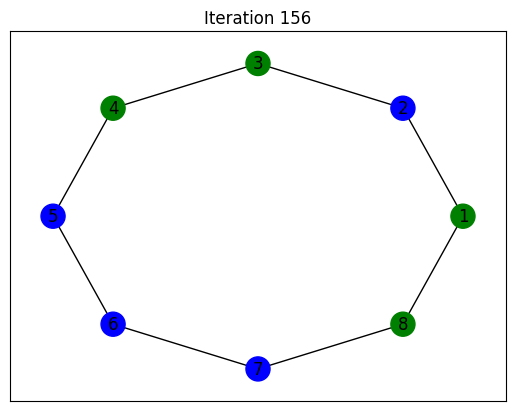

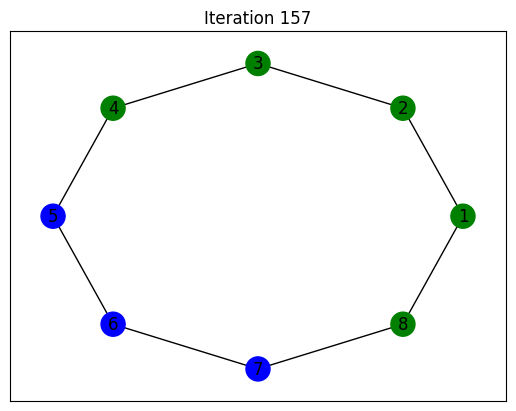

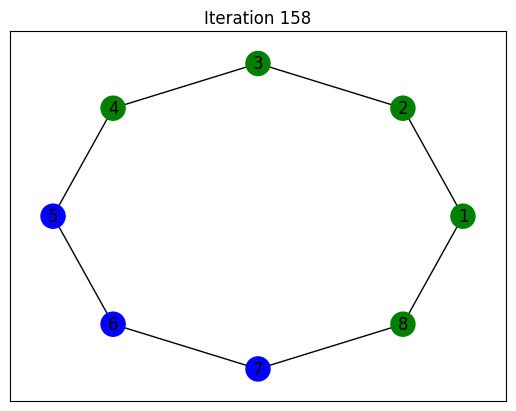

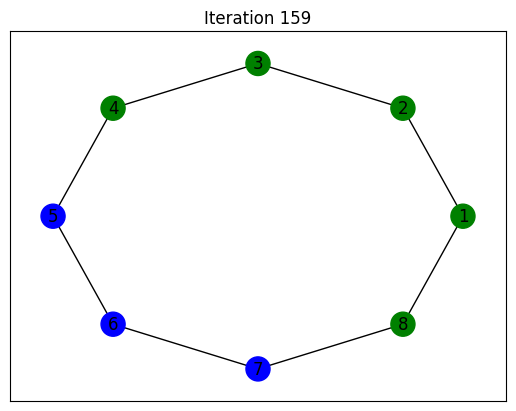

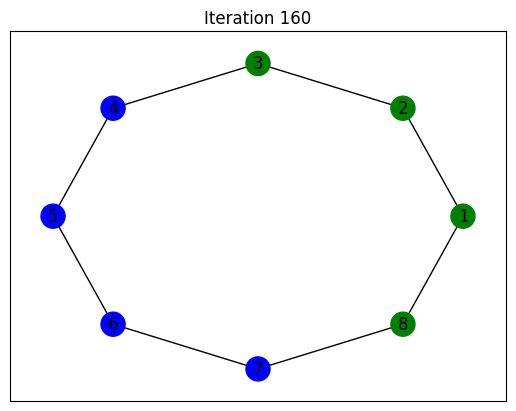

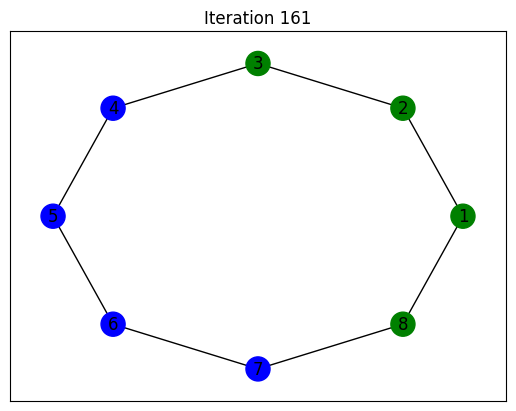

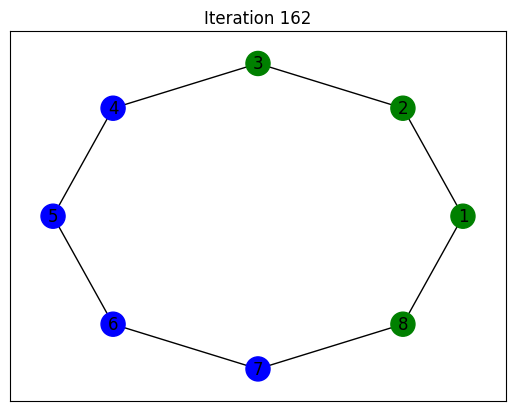

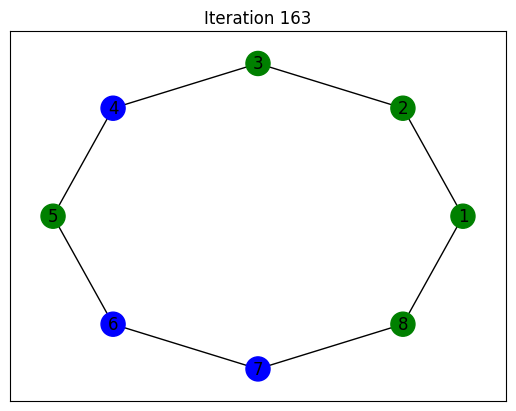

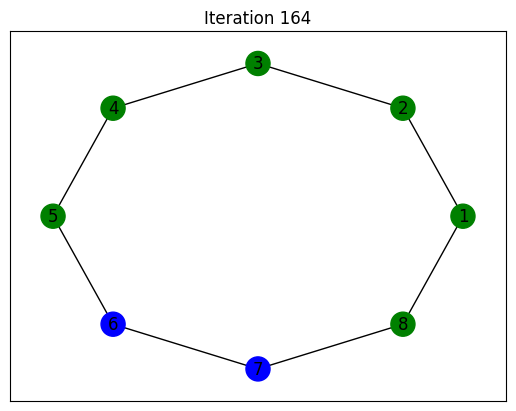

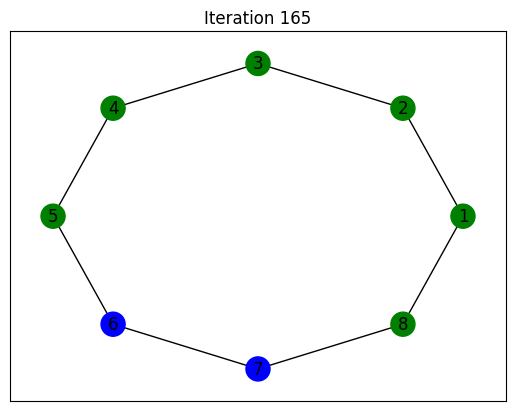

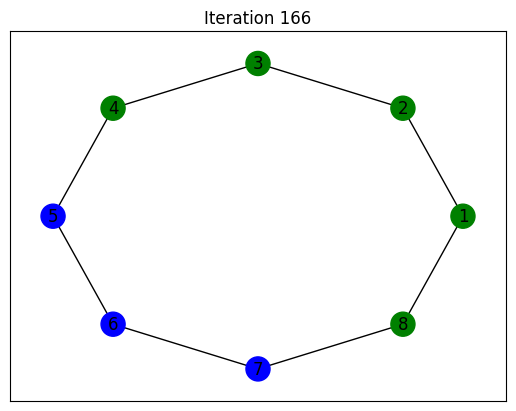

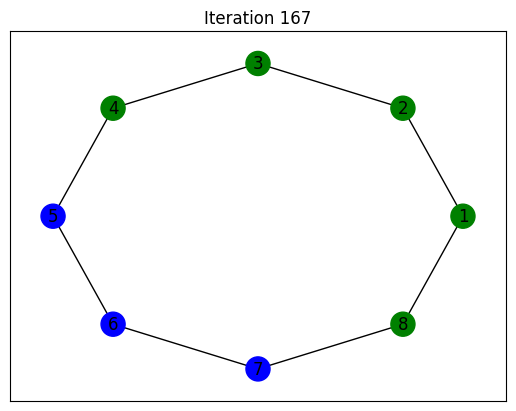

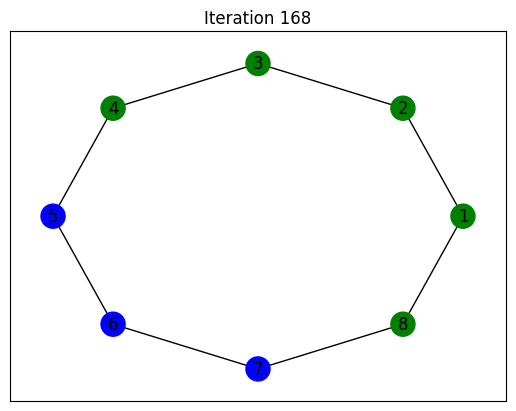

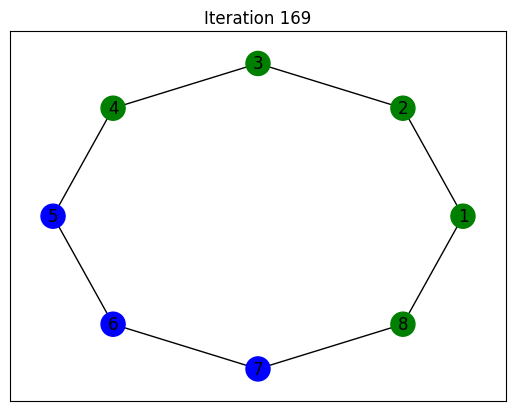

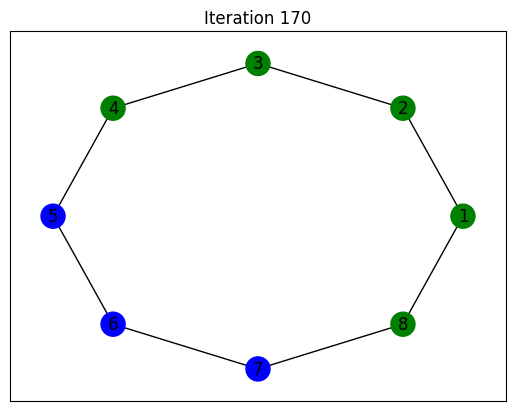

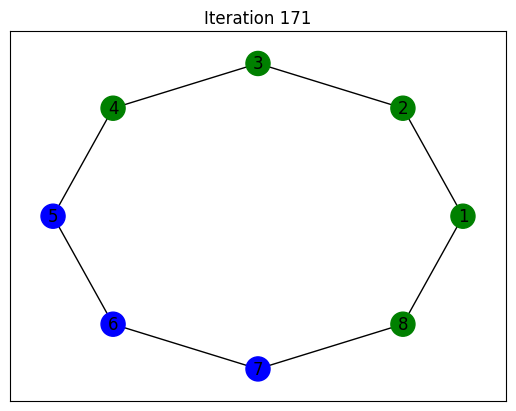

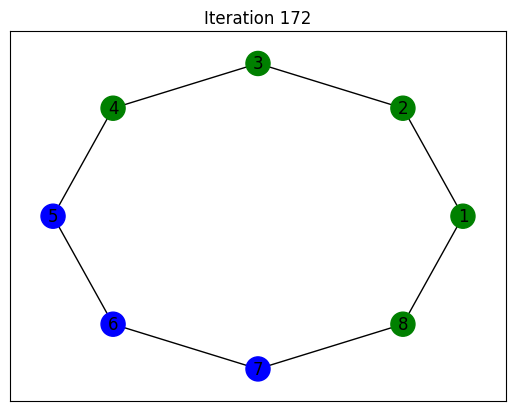

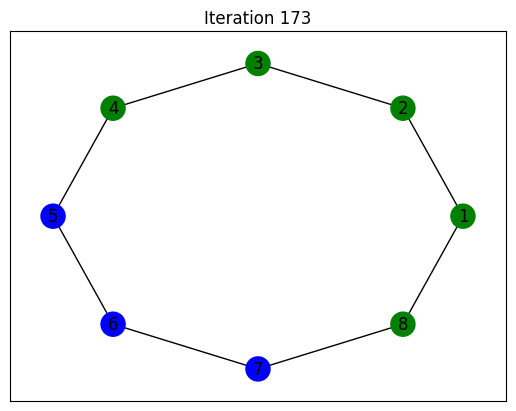

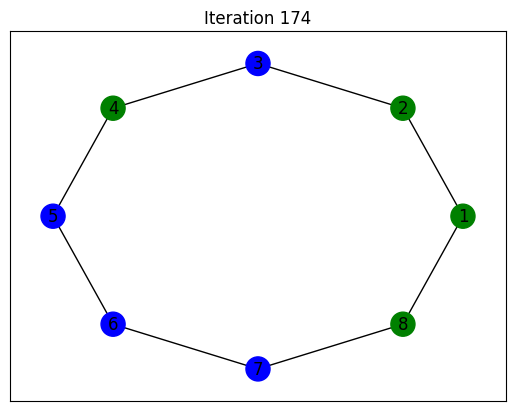

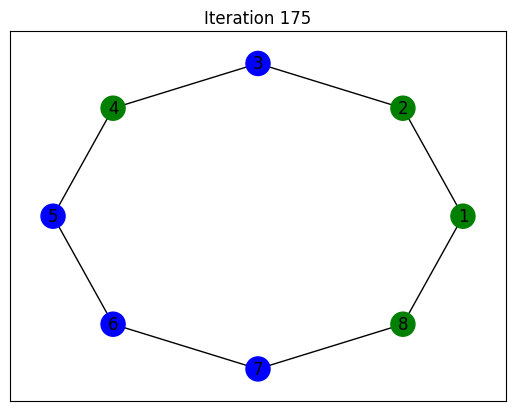

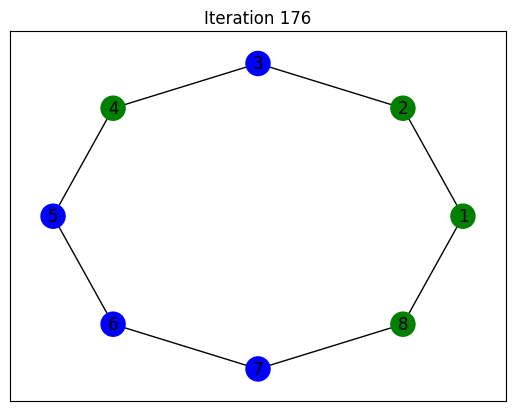

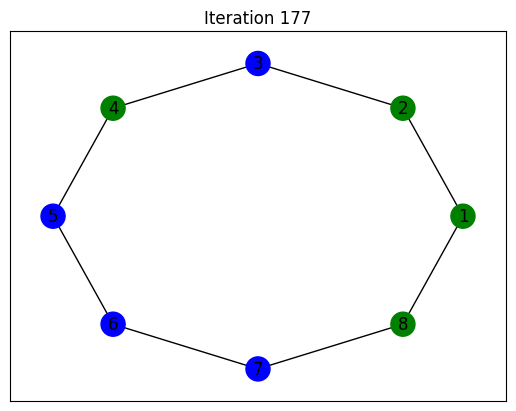

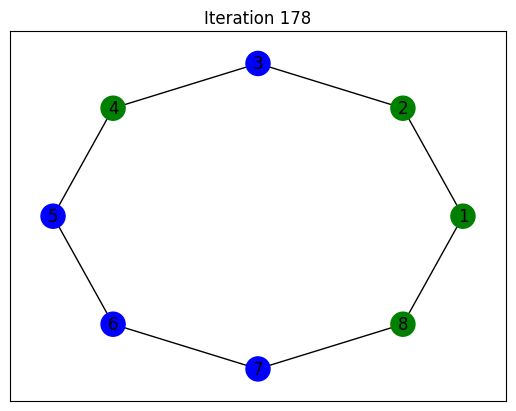

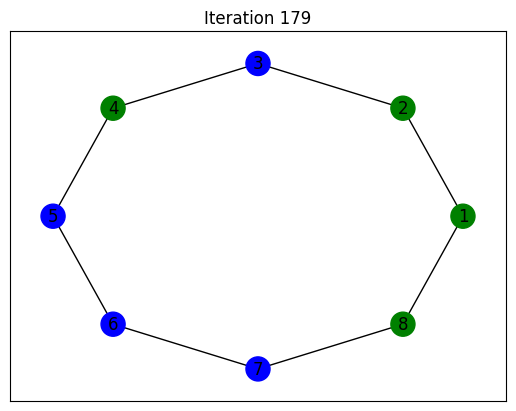

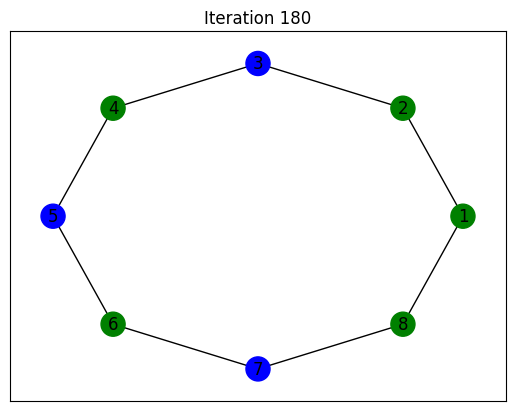

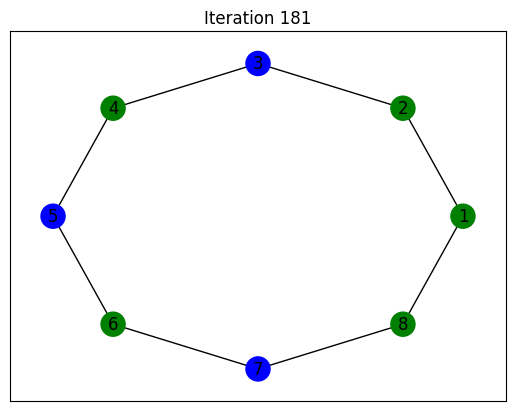

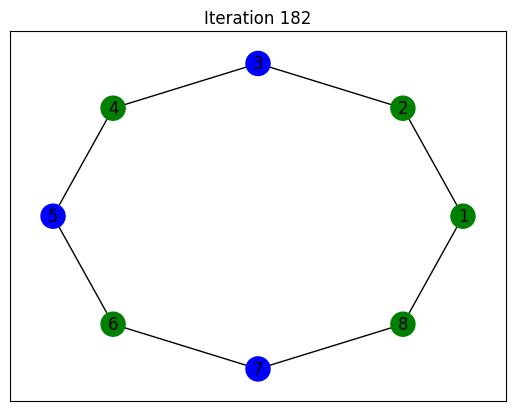

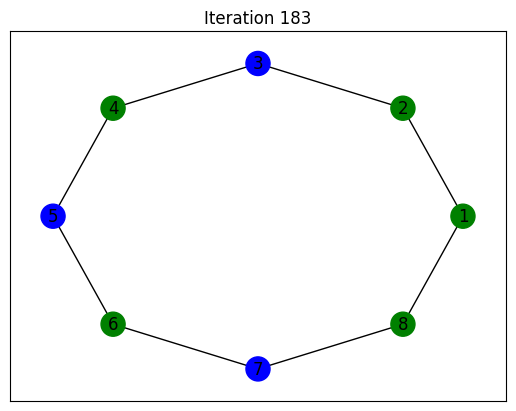

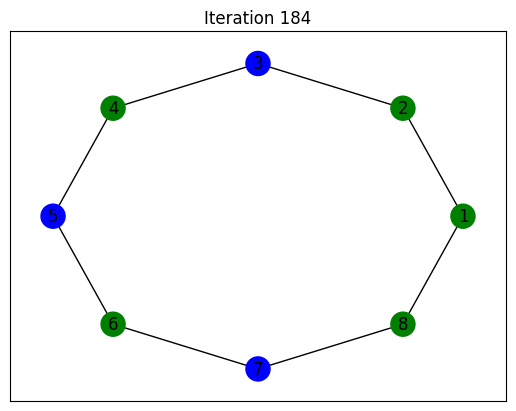

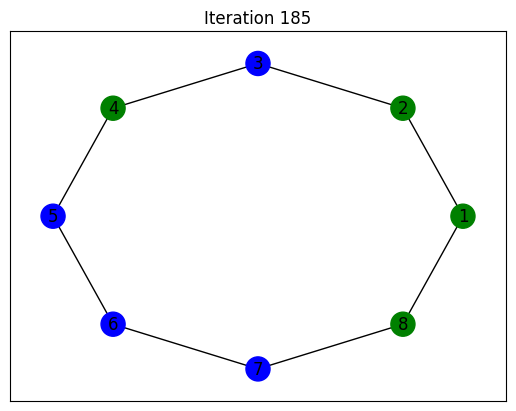

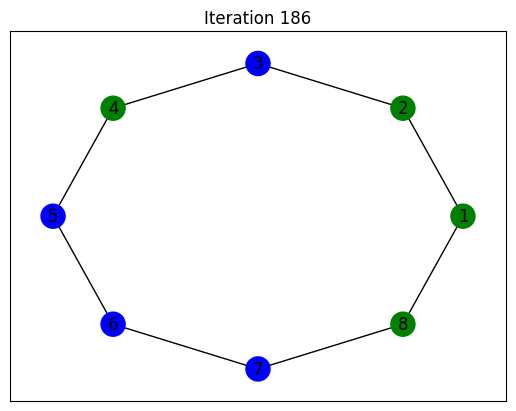

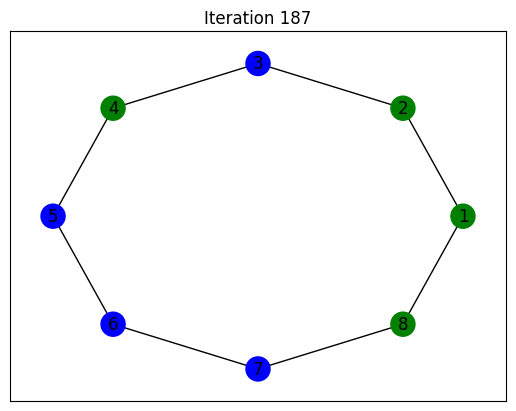

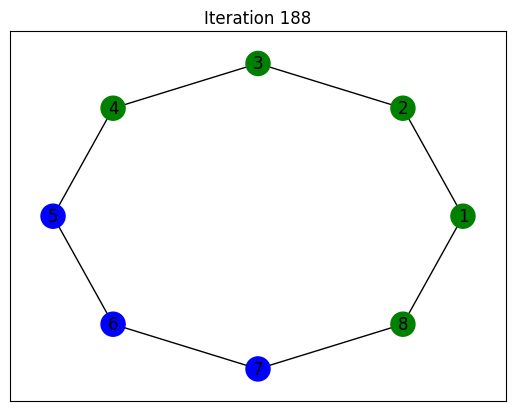

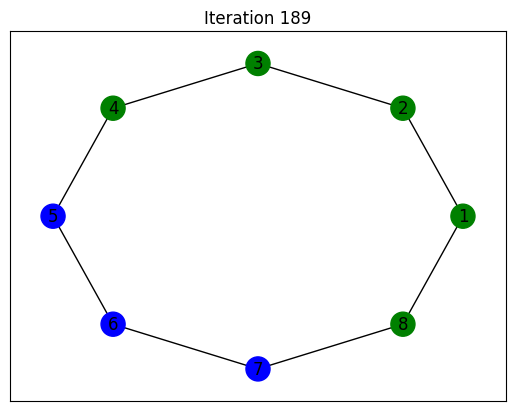

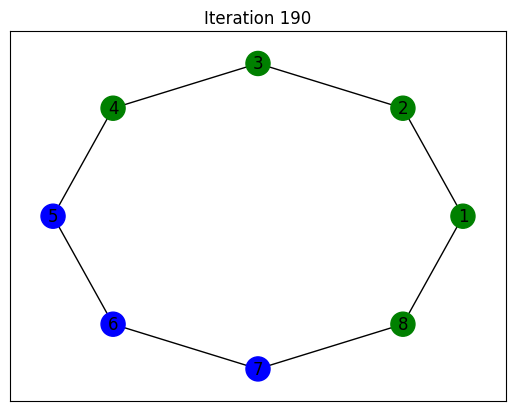

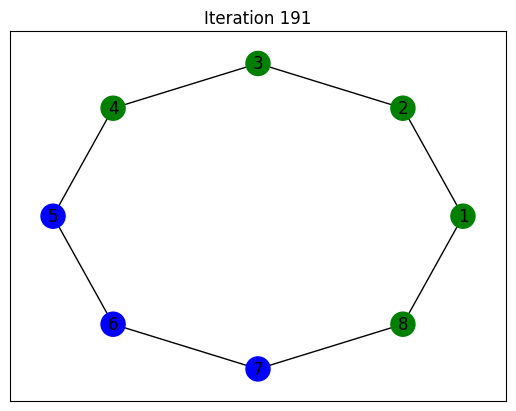

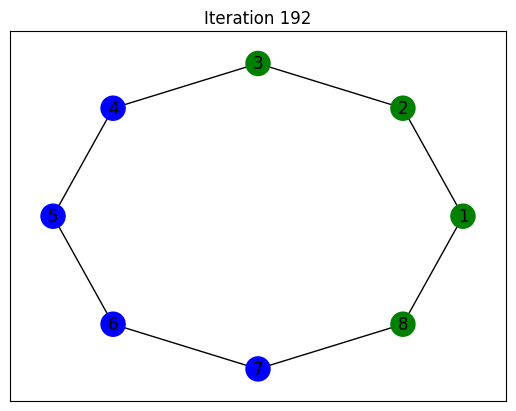

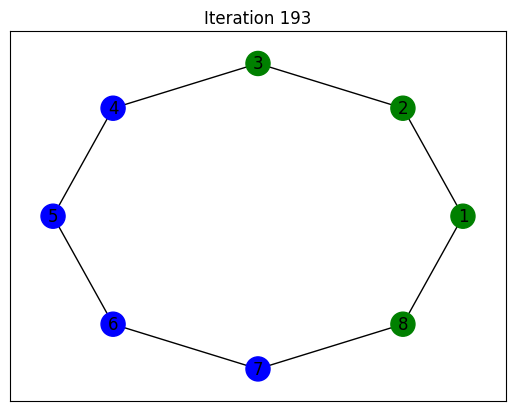

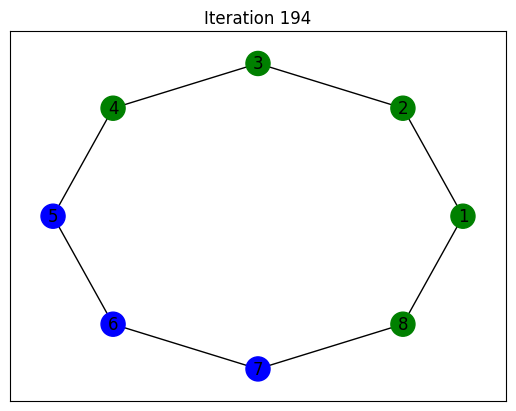

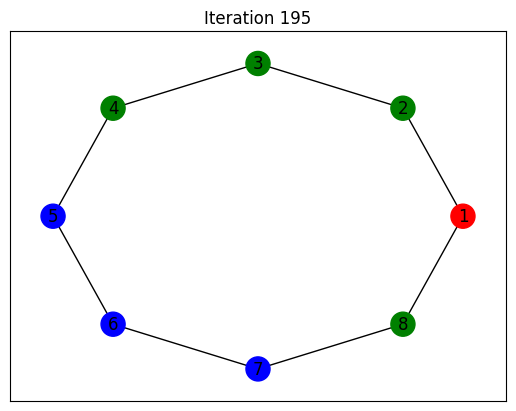

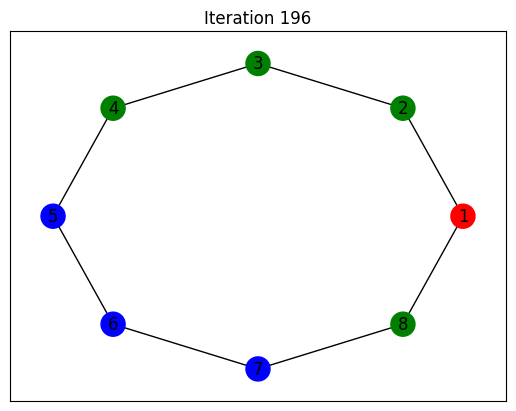

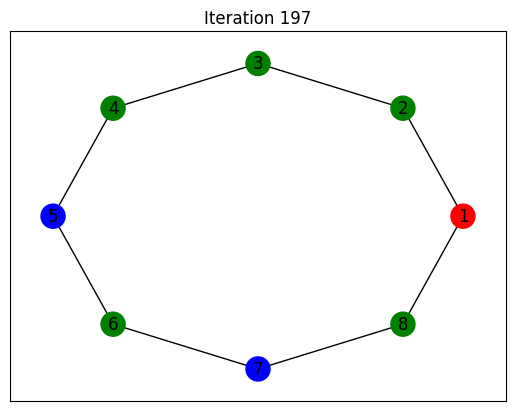

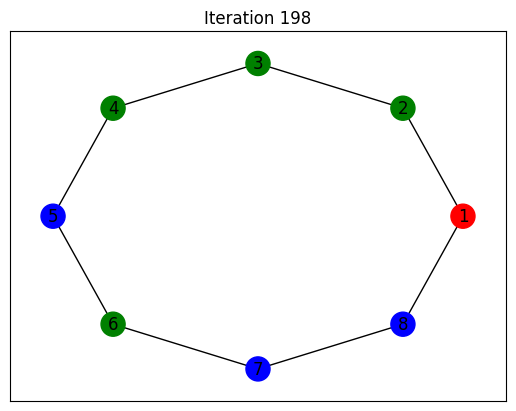

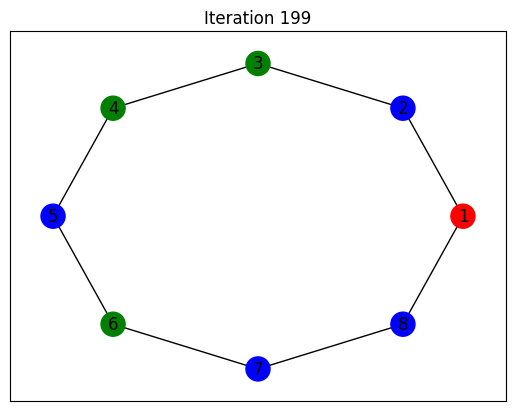

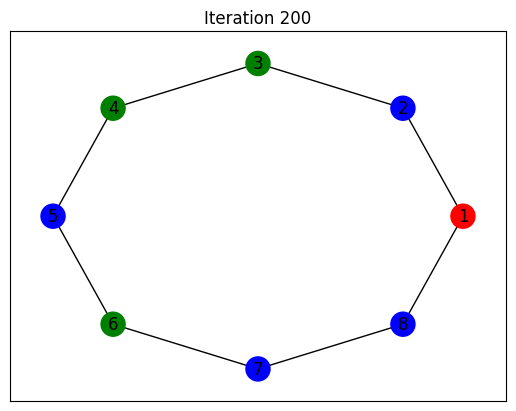

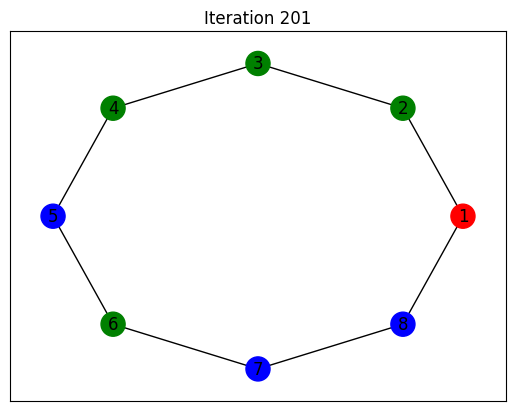

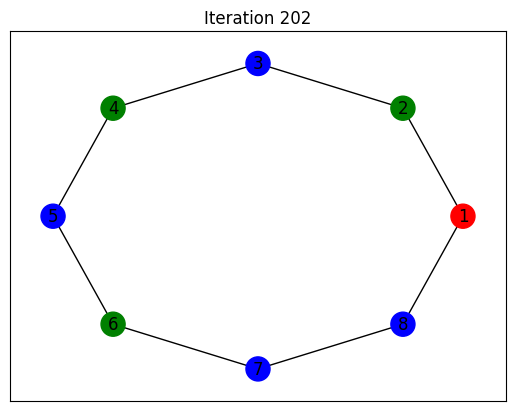

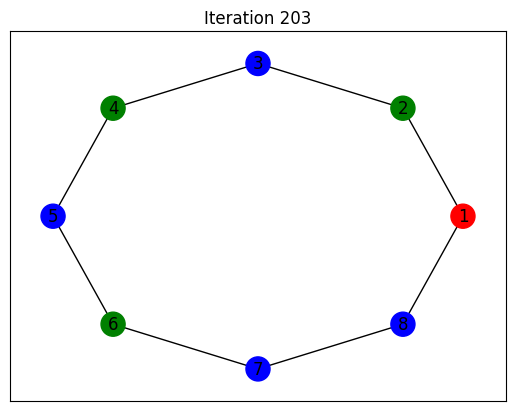

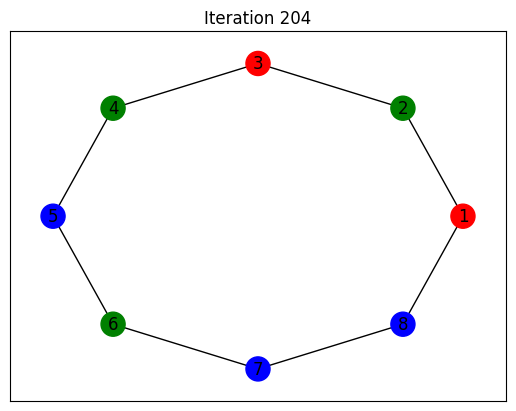

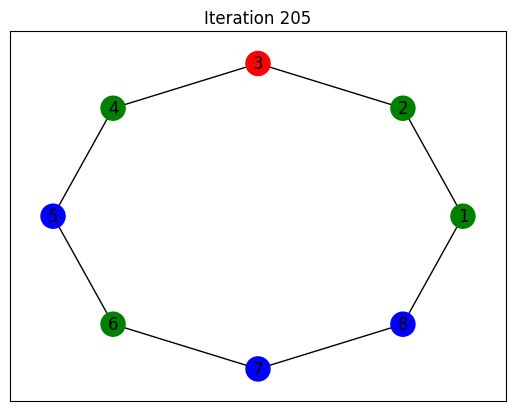

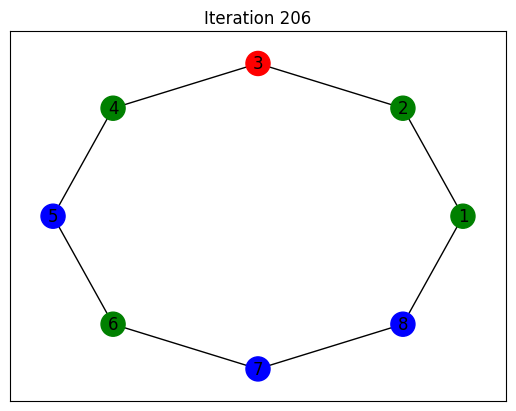

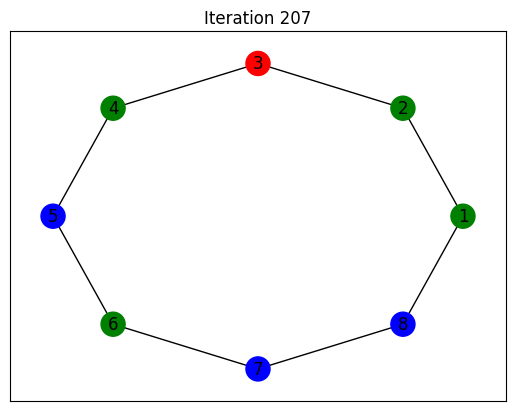

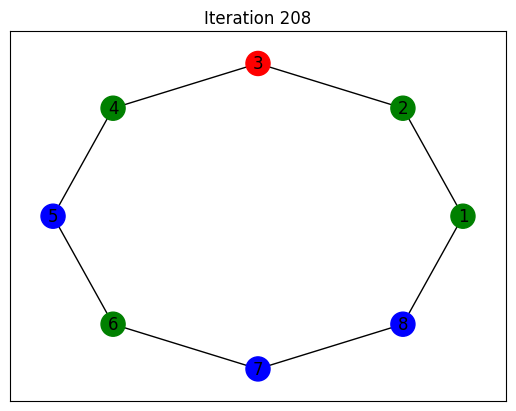

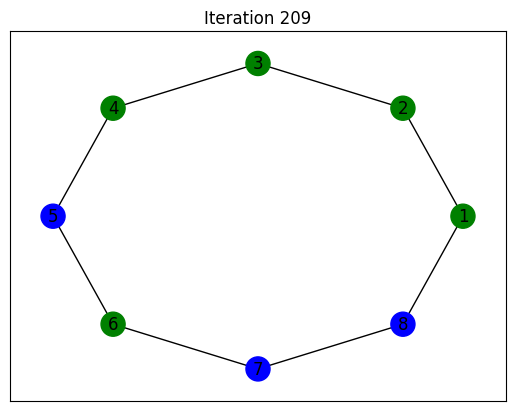

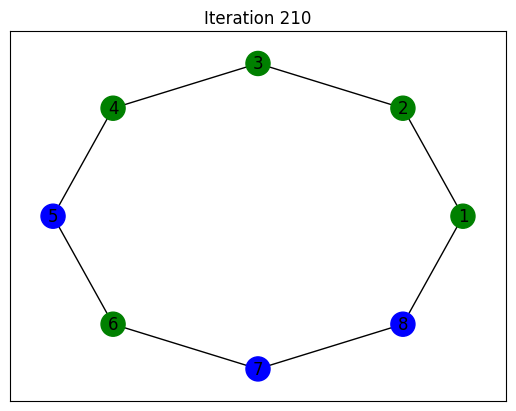

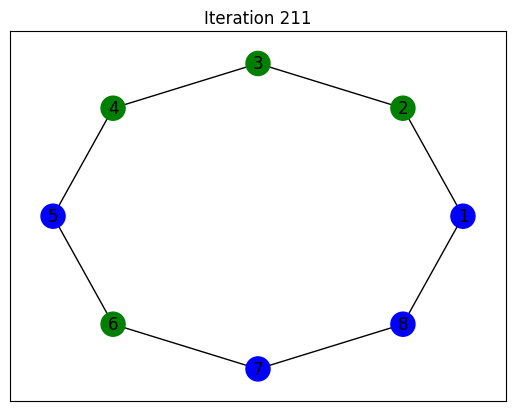

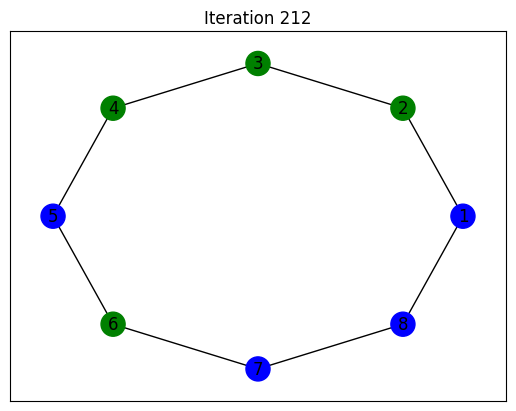

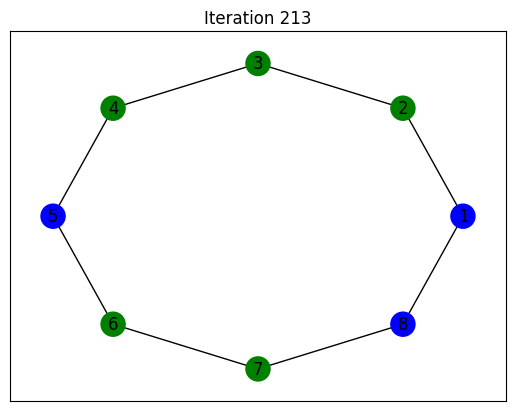

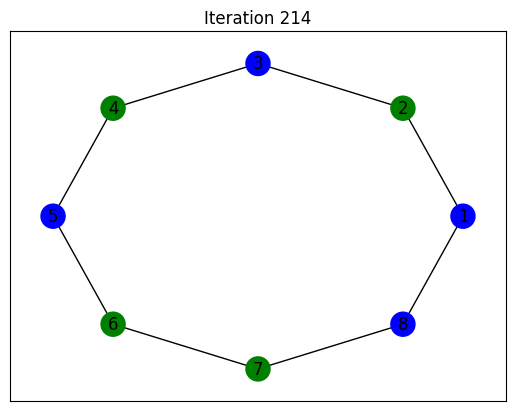

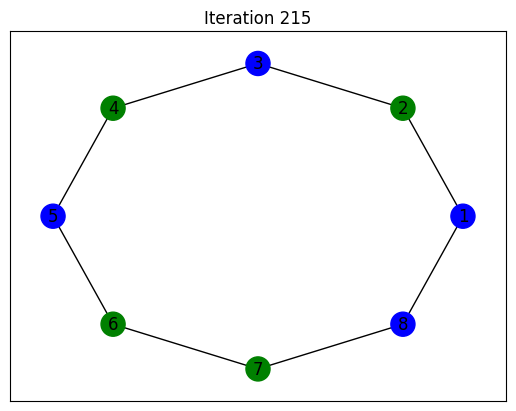

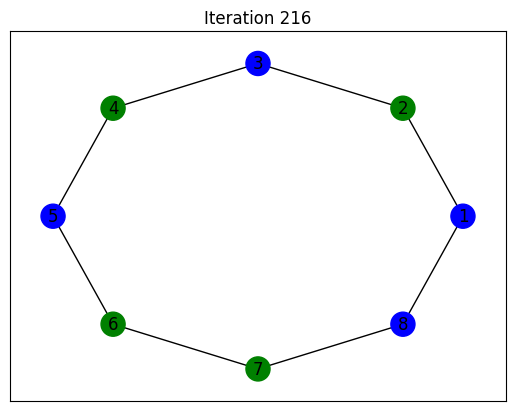

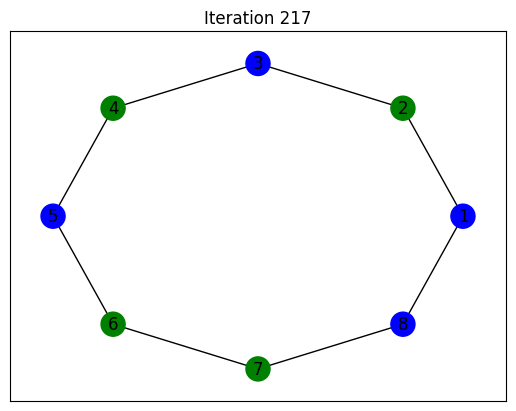

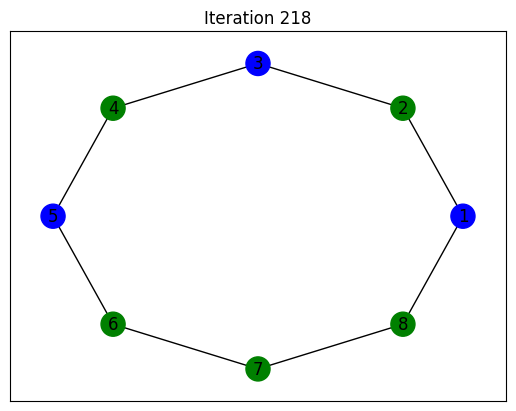

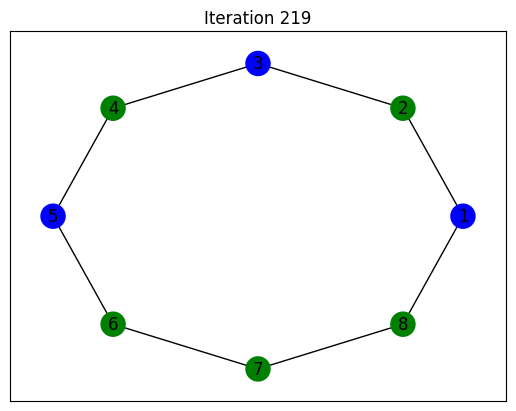

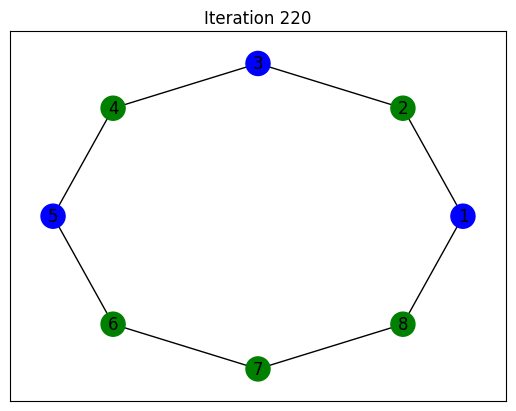

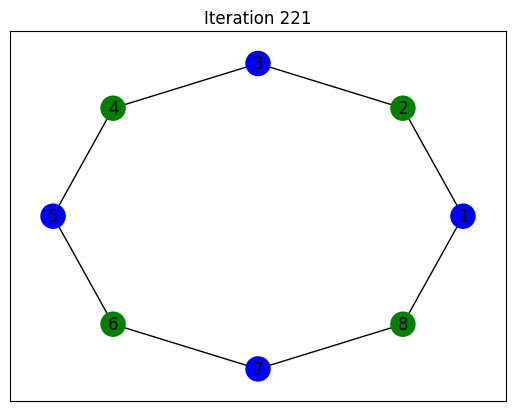

In [79]:
visualize_agents(agent_colors_list)

In [80]:
agent_colors_list

[{'agent_1': 'blue',
  'agent_2': 'green',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'green',
  'agent_7': 'blue',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'green',
  'agent_7': 'green',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'green',
  'agent_7': 'blue',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'blue',
  'agent_7': 'blue',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'blue',
  'agent_7': 'green',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'blue',
  'agent_7':

In [84]:
agent_colors_list

[{'agent_1': 'blue',
  'agent_2': 'green',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'green',
  'agent_7': 'blue',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'green',
  'agent_7': 'green',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'green',
  'agent_7': 'blue',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'blue',
  'agent_7': 'blue',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'blue',
  'agent_7': 'green',
  'agent_8': 'green'},
 {'agent_1': 'blue',
  'agent_2': 'blue',
  'agent_3': 'blue',
  'agent_4': 'green',
  'agent_5': 'blue',
  'agent_6': 'blue',
  'agent_7':

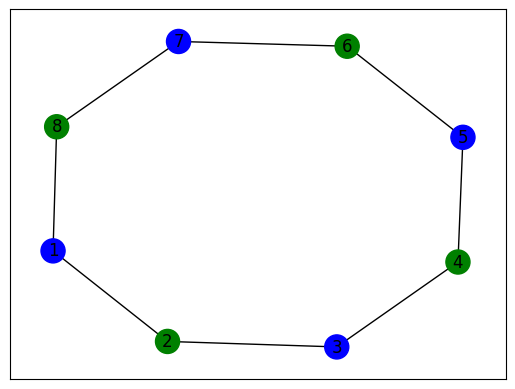

In [89]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Create a list of valid colors
valid_colors = {'blue', 'green', 'red', 'yellow', 'purple', 'orange', 'black', 'white', 'pink', 'grey'}

# Define the list of dictionaries
agent_dicts = agent_colors_list

# Create a graph
G = nx.Graph()

# Add nodes to the graph
num_nodes = 8
G.add_nodes_from(range(1, num_nodes + 1))

# Add edges to the graph
edges = [(i, i + 1) for i in range(1, num_nodes)] + [(num_nodes, 1)]
G.add_edges_from(edges)

# Perform graph coloring
pos = nx.spring_layout(G)

# Function to update the colors
def update(num):
    ax.clear()
    node_colors = []
    for node in G.nodes:
        color = agent_dicts[num].get(f'agent_{node}', 'grey')
        if color not in valid_colors:
            color = 'red'
        node_colors.append(color)
    nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update, frames=len(agent_dicts), repeat=True)
writergif = animation.PillowWriter(fps=1)  
ani.save('rabdom_8.gif', writer=writergif)


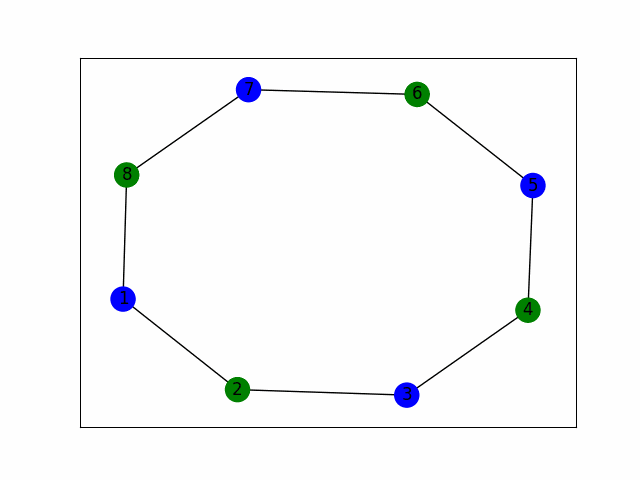

In [90]:
from IPython.display import Image

with open('rabdom_8.gif','rb') as file:
    display(Image(file.read()))